In [1]:
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym_map_bro
import gym_map_bro.src.toy_agents as toy_agents
from gym_map_bro.src.data import *
from gym_map_bro.src.datastore import *

env = gym.make('map-bro-v0')

In [2]:
env_config = {
    "col" : "dns.col",
    "N_batch": 5,										# Number of new lines to try to add to the datastores each epoch
    "batch_stocahsitic": False,							# Whether or not the number of lines in each batch is constant (False) or not (True)
    "name": ['deletion','Hot','Warm','Cold'],			# Names to identify different storage formats
    "ds_size": [10, 20, 40],							# Number of lines in each datastore
    "ds_frac": [1, 0.5, 0.25],							# Value coefficient associated with each storage option
    "val_weight": [np.array([1,1,1]),np.array([1,1,1]),np.array([1,1,1])],								# Weights applied to each value column
    "val_func": linear_val_func,# function for determining total value from various value columns
    "ds_decay": [0.9, 0.95, 0.99],						# Rate at which Value decays in each DataStore
    "vals": [pd.DataFrame(index = np.arange(10),columns=['Age','Key Terrain','Queries']),		# Values associated with each line of data
               pd.DataFrame(index = np.arange(20),columns=['Age','Key Terrain','Queries']),
               pd.DataFrame(index = np.arange(40),columns=['Age','Key Terrain','Queries'])],
    "init_rplan": [np.hstack((np.mgrid[0:10, 1:4][1].astype(int),np.zeros(10).reshape(-1,1).astype(int))),
                    np.hstack((np.mgrid[0:20, 1:4][1].astype(int),np.zeros(20).reshape(-1,1).astype(int))),
                    np.hstack((np.mgrid[0:40, 1:4][1].astype(int),np.zeros(40).reshape(-1,1).astype(int)))], #Initially start with a hot to cold retention plan for data
    "ind": [np.zeros(10).astype(int),np.zeros(20).astype(int),np.zeros(40).astype(int)], #All data is initialized to the first step of it's rplan
    "init_expir": [5,10,50], #Data 20 time steps old must be re-evaluated
    "df": [pd.DataFrame(index = np.arange(10),columns=['Age','Key Terrain','Queries']),		# Dataframes that hold actual datastore contents
           pd.DataFrame(index = np.arange(20),columns=['Age','Key Terrain','Queries']),
           pd.DataFrame(index = np.arange(40),columns=['Age','Key Terrain','Queries'])]
}

## Individual Stepper

In [3]:
env.__myinit__(env_config)
np.random.seed(0)

# Variable initialization for manual looping
loop = 0

# Variables for keeping track of total values over time
vals_plot = [[0],[0],[0]]
t = 0

0 rows expired in 3     Age  Key Terrain  Queries
0   2.0         0.25     0.25
1   5.0         1.00     1.00
2   4.0         0.25     0.25
3   3.0         0.25     0.25
4   2.0         0.25     0.25
5   2.0         0.25     0.25
6   NaN          NaN      NaN
7   NaN          NaN      NaN
8   NaN          NaN      NaN
9   NaN          NaN      NaN
10  NaN          NaN      NaN
11  NaN          NaN      NaN
12  NaN          NaN      NaN
13  NaN          NaN      NaN
14  NaN          NaN      NaN
15  NaN          NaN      NaN
16  NaN          NaN      NaN
17  NaN          NaN      NaN
18  NaN          NaN      NaN
19  NaN          NaN      NaN
20  NaN          NaN      NaN
21  NaN          NaN      NaN
22  NaN          NaN      NaN
23  NaN          NaN      NaN
24  NaN          NaN      NaN
25  NaN          NaN      NaN
26  NaN          NaN      NaN
27  NaN          NaN      NaN
28  NaN          NaN      NaN
29  NaN          NaN      NaN
30  NaN          NaN      NaN
31  NaN          NaN

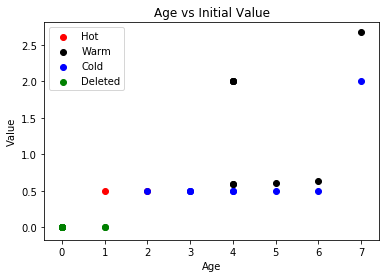

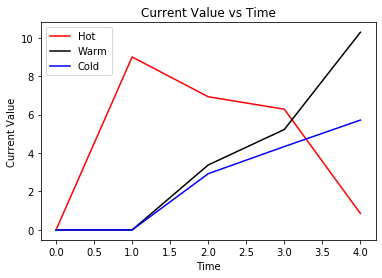

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]


In [7]:
# This cell can be run repeatedly to import new batches from a bro file

# New batch of 5 lines, here represented by 5 random values
batch = pd.read_csv("dns.log",header = 0)
vals = pd.DataFrame(np.ones((5,3))*0.25,columns=['Age','Key Terrain','Queries'])#np.random.random((5,3)),columns=['Age','Key Terrain','Queries'])
vals['Age'] = 0
val_tot = np.zeros(5)
rplan = np.hstack((np.mgrid[0:5, 1:4][1].astype(int),np.zeros(5).reshape(-1,1).astype(int)))
ind = np.zeros(5)
loop += 5
db = dataBatch(batch,vals,val_tot,ind,rplan)

toy_agents.batch_load_static(env, db, 100)
t += 1
env.render(out=0)
clr = ['r','k','b']
sub = plt.subplot()
sub.set_title('Current Value vs Time')
sub.set_xlabel('Time')
sub.set_ylabel('Current Value')
for i in np.arange(env.num_ds):
    vals_plot[i].append(sum(env.ds[env.names[i+1]].dataBatch.get('val_tot')))
    sub.plot(np.arange(t+1),vals_plot[i], c = clr[i], label = env.names[i+1])

sub.legend(loc=2)
plt.show()

#env.render(out=1)
print(env.del_val)

## RL agent run

0 rows expired in 1    Age Key Terrain Queries
0  NaN         NaN     NaN
1  NaN         NaN     NaN
2  NaN         NaN     NaN
3  NaN         NaN     NaN
4  NaN         NaN     NaN
5  NaN         NaN     NaN
6  NaN         NaN     NaN
7  NaN         NaN     NaN
8  NaN         NaN     NaN
9  NaN         NaN     NaN
0 rows expired in 2     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN         NaN     NaN
16  NaN         NaN     NaN
17  NaN         NaN     NaN
18  NaN         NaN     NaN
19  NaN         NaN     NaN
0 rows expired in 3     Age Key Terrain Queries
0   NaN         NaN     NaN

/Users/afitts/projects/MAP_bro/gym_map_bro/src/toy_agents.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = 1./np.log10(i+1.)


Q is [[-1.93101129  7.0836436   0.          0.        ]
 [-1.14386796  5.95080513  0.          0.        ]
 [-2.4077871   4.61926964  0.          0.        ]
 [-2.1376576   1.78618892  0.          0.        ]
 [-2.49911092  1.84007212  0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Hot is full. kicking out nan
Hots val_tots are [1.430378732744839, nan, nan, nan, nan, nan, nan, nan, nan, nan]
Hot is full. kicking out nan
Hots val_tots are [1.430378732744839, 0.8473095986778094, nan, nan, nan, nan, nan, nan, nan, nan]
Hot is full. kicking out nan
Hots val_tots are [1.430378732744839, 0.8473095986778094, 1.7835460015641595, nan, nan, nan, nan, nan, nan, nan]
Hot is full. kicking out nan
Hots val_tots are [1.430378732744839, 0.8473095986778094, 1.7835460015641595, 1.5834500761653292, nan, nan, nan, nan, nan, nan]
Hot is full. kicking out nan
Hots val_tots are [1.430378732744839, 0.8473095986778094, 1.7835460015641595, 1.5834500761653292, 1.851193276585322, nan,

/Users/afitts/projects/MAP_bro/gym_map_bro/src/data.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.batch[i].val[0] += 1


Cold     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN         NaN     NaN
16  NaN         NaN     NaN
17  NaN         NaN     NaN
18  NaN         NaN     NaN
19  NaN         NaN     NaN
20  NaN         NaN     NaN
21  NaN         NaN     NaN
22  NaN         NaN     NaN
23  NaN         NaN     NaN
24  NaN         NaN     NaN
25  NaN         NaN     NaN
26  NaN         NaN     NaN
27  NaN         NaN     NaN
28  NaN         NaN     NaN
29  NaN         NaN     NaN
30  NaN         NaN     NaN
31  NaN         NaN     NaN
32  NaN         NaN     NaN
33  NaN         NaN     NaN
34  NaN        

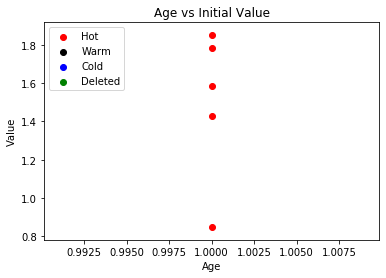

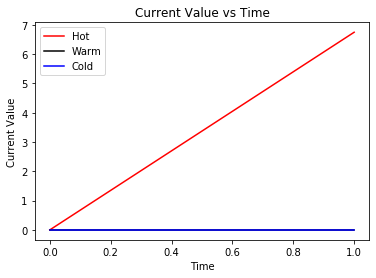

[]
0 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.715189  0.602763
1  1.0     0.423655  0.645894
2  1.0     0.891773  0.963663
3  1.0     0.791725  0.528895
4  1.0     0.925597  0.071036
5  NaN          NaN       NaN
6  NaN          NaN       NaN
7  NaN          NaN       NaN
8  NaN          NaN       NaN
9  NaN          NaN       NaN
0 rows expired in 2     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN         NaN     NaN
16  NaN         NaN     NaN
17  NaN         NaN     NaN
18  NaN         NaN     NaN
19  NaN         NaN     NaN
0 rows expired in 3     Age Key Terrain

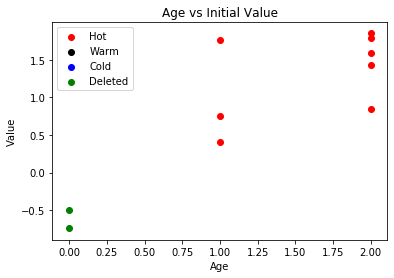

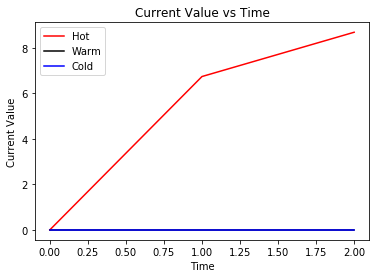

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383]]
0 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.715189  0.602763
1  2.0     0.423655  0.645894
2  2.0     0.891773  0.963663
3  2.0     0.791725  0.528895
4  2.0     0.925597  0.071036
5  1.0     0.204924  0.341698
6  1.0     0.879235  0.543678
7  1.0     0.372679  0.530537
8  NaN          NaN       NaN
9  NaN          NaN       NaN
0 rows expired in 2     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN         NaN     NaN
16  NaN         NaN     NaN
17  NaN         NaN     NaN
18  NaN         NaN     NaN
19  NaN       

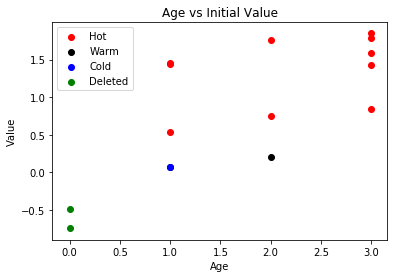

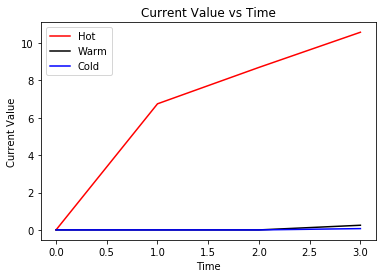

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383]]
0 rows expired in 1    Age  Key Terrain   Queries
0  3.0     0.715189  0.602763
1  3.0     0.423655  0.645894
2  3.0     0.891773  0.963663
3  3.0     0.791725  0.528895
4  3.0     0.925597  0.071036
5  1.0     0.727544  0.024273
6  2.0     0.879235  0.543678
7  2.0     0.372679  0.530537
8  1.0     0.265303  0.127294
9  1.0     0.719389  0.349993
0 rows expired in 2     Age  Key Terrain   Queries
0   1.0     0.068093  0.943851
1   2.0     0.204924  0.341698
2   NaN          NaN       NaN
3   NaN          NaN       NaN
4   NaN          NaN       NaN
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN         

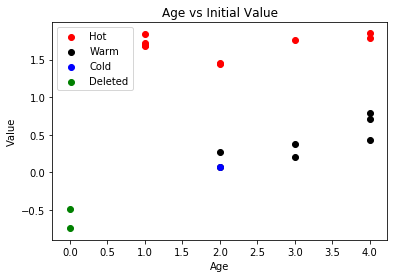

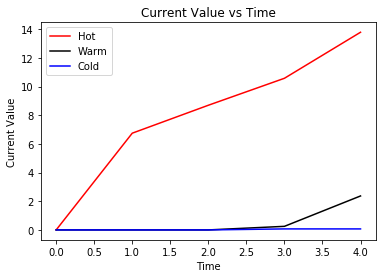

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383]]
0 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.840641  0.059758
1  1.0     0.847308  0.414457
2  4.0     0.891773  0.963663
3  1.0     0.919738  0.960766
4  4.0     0.925597  0.071036
5  2.0     0.727544  0.024273
6  3.0     0.879235  0.543678
7  1.0     0.848833  0.804878
8  1.0     0.862559  0.586277
9  2.0     0.719389  0.349993
0 rows expired in 2     Age  Key Terrain   Queries
0   2.0     0.068093  0.943851
1   3.0     0.204924  0.341698
2   2.0     0.265303  0.127294
3   3.0     0.372679  0.530537
4   4.0     0.423655  0.645894
5   4.0     0.715189  0.602763
6   4.0     0.791725  0.528895
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN         

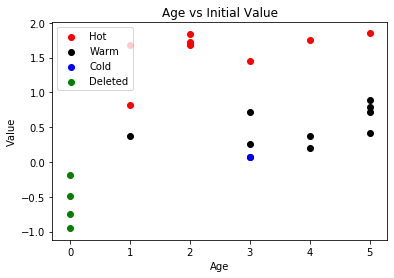

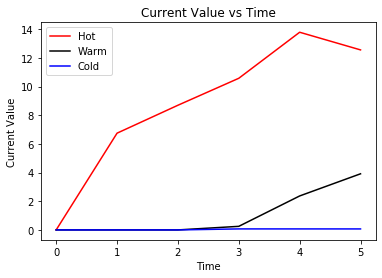

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804]]
1 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.840641  0.059758
1  2.0     0.847308  0.414457
2  1.0     0.408677  0.518432
3  2.0     0.919738  0.960766
4  5.0     0.925597  0.071036
5  3.0     0.727544  0.024273
6  4.0     0.879235  0.543678
7  2.0     0.848833  0.804878
8  2.0     0.862559  0.586277
9  1.0     0.840830  0.497231
0 rows expired in 2     Age  Key Terrain   Queries
0   3.0     0.068093  0.943851
1   4.0     0.204924  0.341698
2   3.0     0.265303  0.127294
3   4.0     0.372679  0.530537
4   5.0     0.423655  0.645894
5   5.0     0.715189  0.602763
6   5.0     0.791725  0.528895
7   3.0     0.719389  0.349993
8   1.0     0.375549  0.568162
9   5.0     0.891773  0.963663
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN    

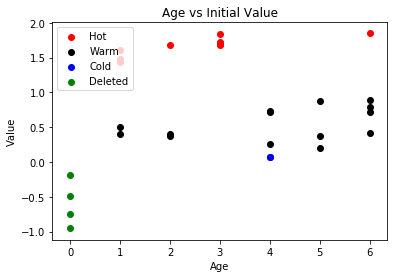

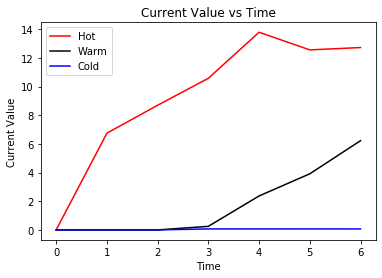

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804]]
1 rows expired in 1    Age  Key Terrain   Queries
0  3.0     0.840641  0.059758
1  3.0     0.847308  0.414457
2  1.0     0.743340  0.424505
3  3.0     0.919738  0.960766
4  1.0     0.718816  0.942839
5  1.0     0.802148  0.322907
6  6.0     0.925597  0.071036
7  3.0     0.848833  0.804878
8  3.0     0.862559  0.586277
9  2.0     0.840830  0.497231
0 rows expired in 2     Age  Key Terrain   Queries
0   4.0     0.068093  0.943851
1   5.0     0.204924  0.341698
2   4.0     0.265303  0.127294
3   5.0     0.372679  0.530537
4   6.0     0.423655  0.645894
5   6.0     0.715189  0.602763
6   6.0     0.791725  0.528895
7   4.0     0.719389  0.349993
8   2.0     0.375549  0.568162
9   6.0     0.891773  0.963663
10  2.0     0.408677  0.518432
11  1.0     0.507635  0.163910
12  4.0     0.727544  0.024273
13  5.0     0.879235  0.543678
14  1.0     0.400510  0.410916
15  NaN          NaN    

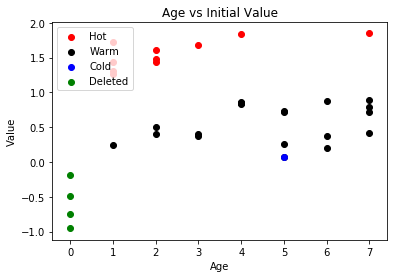

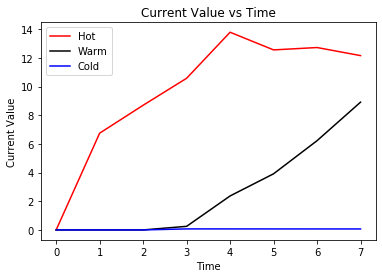

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804]]
1 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.634091  0.577731
1  1.0     0.865805  0.388099
2  2.0     0.743340  0.424505
3  4.0     0.919738  0.960766
4  2.0     0.718816  0.942839
5  2.0     0.802148  0.322907
6  1.0     0.719852  0.767361
7  1.0     0.652257  0.304572
8  7.0     0.925597  0.071036
9  3.0     0.840830  0.497231
0 rows expired in 2     Age  Key Terrain   Queries
0   5.0     0.068093  0.943851
1   6.0     0.204924  0.341698
2   5.0     0.265303  0.127294
3   6.0     0.372679  0.530537
4   7.0     0.423655  0.645894
5   7.0     0.715189  0.602763
6   7.0     0.791725  0.528895
7   5.0     0.719389  0.349993
8   3.0     0.375549  0.568162
9   7.0     0.891773  0.963663
10  3.0     0.408677  0.518432
11  2.0     0.507635  0.163910
12  5.0     0.727544  0.024273
13  6.0     0.879235  0.543678
14  2.0     0.400510  0.410916
15  1.0     0.240545  0.

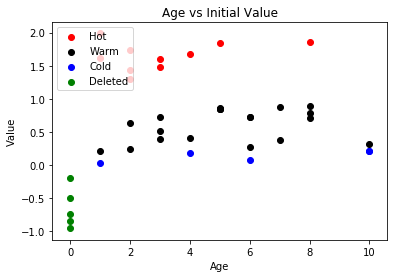

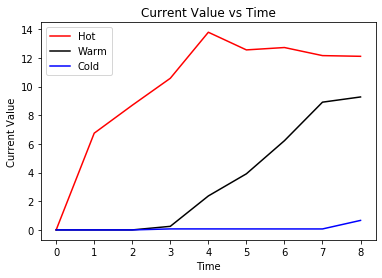

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249]]
2 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.805166  0.662487
1  2.0     0.865805  0.388099
2  3.0     0.743340  0.424505
3  5.0     0.919738  0.960766
4  8.0     0.925597  0.071036
5  3.0     0.802148  0.322907
6  2.0     0.719852  0.767361
7  2.0     0.652257  0.304572
8  1.0     0.995713  0.691129
9  4.0     0.840830  0.497231
1 rows expired in 2      Age  Key Terrain   Queries
0    2.0     0.634091  0.577731
1    3.0     0.718816  0.942839
2    6.0     0.265303  0.127294
3    7.0     0.372679  0.530537
4   10.0     0.423655  0.645894
5    8.0     0.715189  0.602763
6    8.0     0.791725  0.528895
7    6.0     0.719389  0.349993
8    1.0     0.219634  0.867694
9    8.0     0.891773  0.963663
10   4.0     0.408677  0.518432
11   3.0     0.507635  0.163910
12   6.0     0.727544  0.024273
13   7.0     0.879235  0.543678
14   3.0     

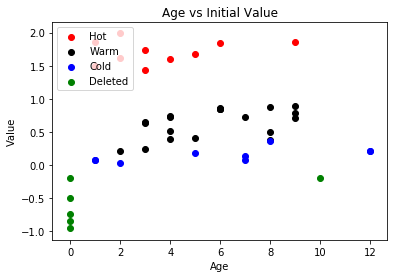

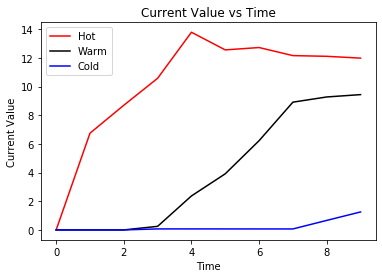

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864]]
3 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.805166  0.662487
1  3.0     0.865805  0.388099
2  9.0     0.925597  0.071036
3  1.0     0.746936  0.487746
4  1.0     0.925635  0.326041
5  4.0     0.802148  0.322907
6  3.0     0.719852  0.767361
7  6.0     0.919738  0.960766
8  2.0     0.995713  0.691129
9  5.0     0.840830  0.497231
0 rows expired in 2     Age  Key Terrain   Queries
0   3.0     0.634091  0.577731
1   4.0     0.718816  0.942839
2   4.0     0.743340  0.424505
3   8.0     0.372679  0.530537
4   3.0     0.652257  0.304572
5   9.0     0.715189  0.602763
6   9.0     0.791725  0.528895
7   8.0     0.719389  0.349993
8   2.0     0.219634  0.867694
9   9.0     0.891773  0.963663
10  5.0     0.408677  0.518432
11  4.0     0.507635  0.163910
12  7.0     0.727544  0.024273
13  8.0     0.879235  0.543678

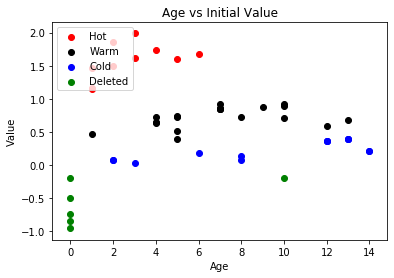

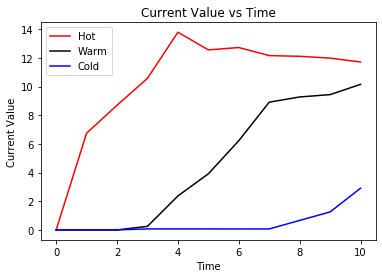

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864]]
2 rows expired in 1    Age  Key Terrain   Queries
0  3.0     0.805166  0.662487
1  4.0     0.865805  0.388099
2  1.0     0.580125  0.045177
3  2.0     0.746936  0.487746
4  2.0     0.925635  0.326041
5  5.0     0.802148  0.322907
6  6.0     0.840830  0.497231
7  1.0     0.730863  0.840734
8  3.0     0.995713  0.691129
9  1.0     0.577305  0.893718
5 rows expired in 2      Age  Key Terrain   Queries
0    4.0     0.634091  0.577731
1    5.0     0.718816  0.942839
2    5.0     0.743340  0.424505
3   10.0     0.925597  0.071036
4    4.0     0.652257  0.304572
5   10.0     0.715189  0.602763
6   13.0     0.791725  0.528895
7   12.0     0.719389  0.349993
8    1.0     0.469557  0.911192
9   10.0     0.891773  0.963663
10   7.0     0.919738  0.960766
11   5.0     0.507635  0.163910
12   8.0     0.727544  0.024273
13   9.0     0.8

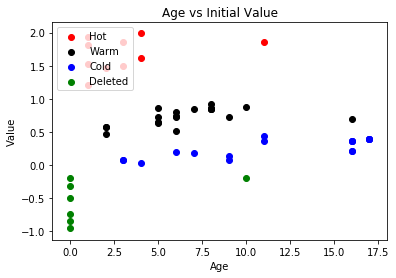

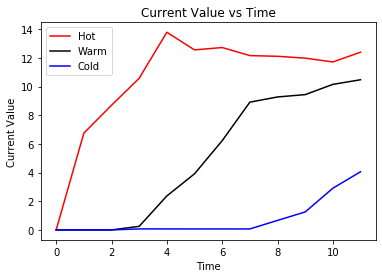

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143]]
1 rows expired in 1     Age  Key Terrain   Queries
0   4.0     0.805166  0.662487
1  11.0     0.925597  0.071036
2   1.0     0.966372  0.497740
3   3.0     0.746936  0.487746
4   3.0     0.925635  0.326041
5   1.0     0.907649  0.674604
6   1.0     0.603488  0.660240
7   2.0     0.730863  0.840734
8   4.0     0.995713  0.691129
9   1.0     0.759382  0.024739
2 rows expired in 2      Age  Key Terrain   Queries
0    5.0     0.634091  0.577731
1    6.0     0.718816  0.942839
2    6.0     0.743340  0.424505
3    2.0     0.577305  0.893718
4    5.0     0.652257  0.304572
5    2.0     0.580125  0.045177
6    5.0     0.865805  0.388099
7    6.0     0.802148  0.322907
8    2.0     0.469557  0.911192
9    7.0     0.840830  0.497231
10   8.0     0.919738  0.960766
11   6.0     0.507635  0.163910
12   9.0 

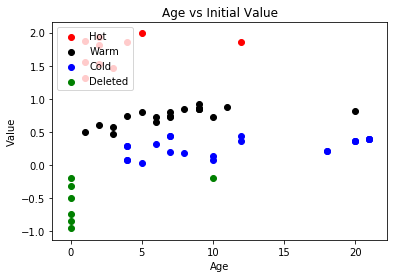

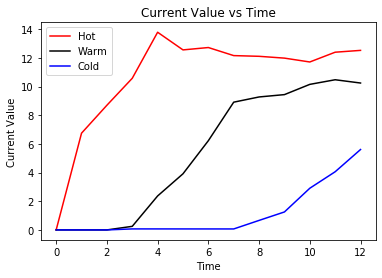

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143]]
2 rows expired in 1     Age  Key Terrain   Queries
0   1.0     0.780488  0.393289
1   1.0     0.935324  0.910381
2   2.0     0.966372  0.497740
3  12.0     0.925597  0.071036
4   4.0     0.925635  0.326041
5   2.0     0.907649  0.674604
6   1.0     0.659362  0.465579
7   3.0     0.730863  0.840734
8   5.0     0.995713  0.691129
9   2.0     0.759382  0.024739
3 rows expired in 2      Age  Key Terrain   Queries
0    2.0     0.603488  0.660240
1    7.0     0.718816  0.942839
2    7.0     0.743340  0.424505
3   11.0     0.879235  0.543678
4    6.0     0.652257  0.304572
5    3.0     0.580125  0.045177
6   20.0     0.719389  0.349993
7    7.0     0.802148  0.322907
8    3.0     0.469557  0.911192
9    8.0     0.840830  0.497231
10   9.0     0.919738  0.960766
11   4.0     0.746936  0.487746
12  10.0 

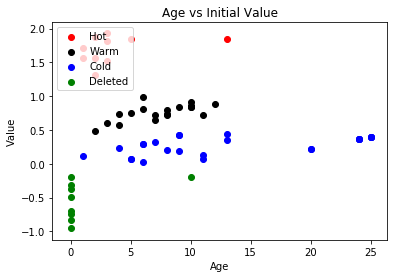

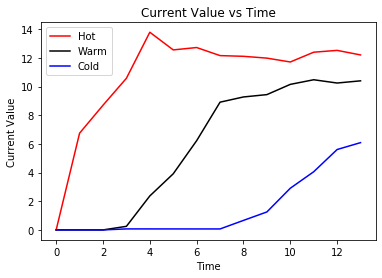

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635]]
2 rows expired in 1     Age  Key Terrain   Queries
0   2.0     0.780488  0.393289
1   2.0     0.935324  0.910381
2   3.0     0.966372  0.497740
3   1.0     0.855807  0.027789
4   5.0     0.925635  0.326041
5   3.0     0.907649  0.674604
6   2.0     0.659362  0.465579
7  13.0     0.925597  0.071036
8   1.0     0.784167  0.401780
9   3.0     0.759382  0.024739
7 rows expired in 2      Age  Key Terrain   Queries
0    3.0     0.603488  0.660240
1    8.0     0.718816  0.942839
2    8.0     0.743340  0.424505
3   12.0     0.879235  0.543678
4    7.0     0.652257  0.304572
5    4.0     0.580125  0.045177
6    4.0     0.730863  0.840734
7    8.0     0.802148  0.322907
8   11.0     0.727544  0.024273
9    9.0     0.840830  0.497231
10  10.0     0.919

Hot     Age  Key Terrain   Queries
0   3.0     0.780488  0.393289
1   3.0     0.935324  0.910381
2   4.0     0.966372  0.497740
3   2.0     0.855807  0.027789
4   1.0     0.904267  0.008123
5   4.0     0.907649  0.674604
6  14.0     0.925597  0.071036
7   6.0     0.925635  0.326041
8   2.0     0.784167  0.401780
9   4.0     0.759382  0.024739
Warm      Age  Key Terrain   Queries
0    4.0     0.603488  0.660240
1    9.0     0.718816  0.942839
2    9.0     0.743340  0.424505
3   11.0     0.848833  0.804878
4    8.0     0.652257  0.304572
5    5.0     0.580125  0.045177
6    5.0     0.730863  0.840734
7    9.0     0.802148  0.322907
8    1.0     0.403682  0.003524
9   10.0     0.840830  0.497231
10  11.0     0.847308  0.414457
11   6.0     0.746936  0.487746
12   7.0     0.995713  0.691129
13   7.0     0.805166  0.662487
14   3.0     0.492401  0.062091
15   8.0     0.719852  0.767361
16   3.0     0.659362  0.465579
17  13.0     0.879235  0.543678
18  12.0     0.727544  0.024273
19  11.0  

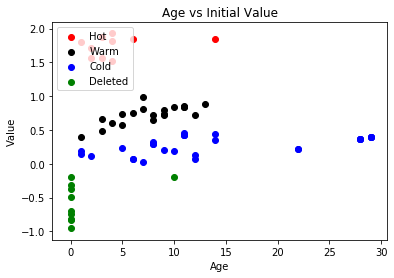

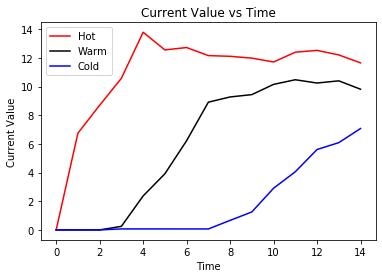

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927]]
2 rows expired in 1     Age  Key Terrain   Queries
0   3.0     0.780488  0.393289
1   3.0     0.935324  0.910381
2   4.0     0.966372  0.497740
3   2.0     0.855807  0.027789
4   1.0     0.904267  0.008123
5   4.0     0.907649  0.674604
6  14.0     0.925597  0.071036
7   6.0     0.925635  0.326041
8   2.0     0.784167  0.401780
9   4.0     0.759382  0.024739
6 rows expired in 2      Age  Key Terrain   Queries
0    4.0     0.603488  0.660240
1    9.0     0.718816  0.942839
2    9.0     0.743340  0.424505
3   11.0     0.848833  0.804878
4    8.0     0.652257  0.304572
5    5.0     0.580125  0.045177
6    5.0     0.730863  0.840734
7    9.0     0.802148  0.322907
8    1.0     0.403682  0.003524
9   10.0     0.840830  

Hot    Age  Key Terrain   Queries
0  4.0     0.780488  0.393289
1  4.0     0.935324  0.910381
2  5.0     0.966372  0.497740
3  3.0     0.855807  0.027789
4  2.0     0.904267  0.008123
5  5.0     0.907649  0.674604
6  1.0     0.918408  0.599694
7  1.0     0.835298  0.832838
8  3.0     0.784167  0.401780
9  7.0     0.925635  0.326041
Warm      Age  Key Terrain   Queries
0    5.0     0.603488  0.660240
1   10.0     0.718816  0.942839
2   10.0     0.743340  0.424505
3   12.0     0.840641  0.059758
4    9.0     0.652257  0.304572
5    6.0     0.580125  0.045177
6    6.0     0.730863  0.840734
7   10.0     0.802148  0.322907
8    2.0     0.403682  0.003524
9   13.0     0.727544  0.024273
10   1.0     0.496702  0.025096
11   7.0     0.746936  0.487746
12   8.0     0.995713  0.691129
13   8.0     0.805166  0.662487
14   4.0     0.492401  0.062091
15   9.0     0.719852  0.767361
16   4.0     0.659362  0.465579
17   5.0     0.759382  0.024739
18  11.0     0.840830  0.497231
19  12.0     0.847308

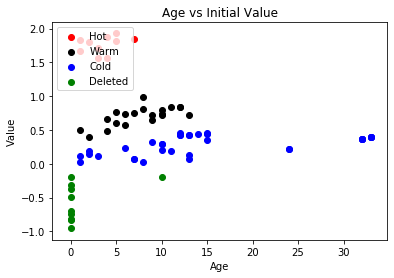

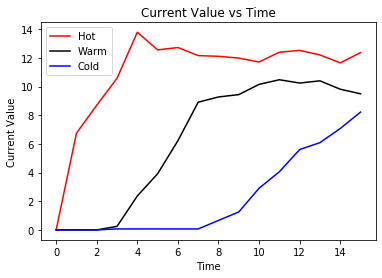

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927]]
3 rows expired in 1    Age  Key Terrain   Queries
0  4.0     0.780488  0.393289
1  4.0     0.935324  0.910381
2  5.0     0.966372  0.497740
3  3.0     0.855807  0.027789
4  2.0     0.904267  0.008123
5  5.0     0.907649  0.674604
6  1.0     0.918408  0.599694
7  1.0     0.835298  0.832838
8  3.0     0.784167  0.401780
9  7.0     0.925635  0.326041
7 rows expired in 2      Age  Key Terrain   Queries
0    5.0     0.603488  0.660240
1   10.0     0.718816  0.942839
2   10.0     0.743340  0.424505
3   12.0     0.840641  0.059758
4    9.0     0.652257  0.304572
5    6.0     0.580125  0.045177
6    6.0     0.730863  0.840734
7   10.0     0.802148  0.322907
8    2.0     0.403682  0.003524
9   13.0     0.727544  0.024273
10

Hot    Age  Key Terrain   Queries
0  8.0     0.925635  0.326041
1  5.0     0.935324  0.910381
2  1.0     0.734579  0.334548
3  4.0     0.855807  0.027789
4  3.0     0.904267  0.008123
5  1.0     0.852355  0.771011
6  2.0     0.918408  0.599694
7  2.0     0.835298  0.832838
8  4.0     0.784167  0.401780
9  1.0     0.919857  0.420942
Warm      Age  Key Terrain   Queries
0    6.0     0.603488  0.660240
1   11.0     0.802148  0.322907
2    5.0     0.780488  0.393289
3    6.0     0.966372  0.497740
4   10.0     0.652257  0.304572
5    7.0     0.580125  0.045177
6    7.0     0.730863  0.840734
7    6.0     0.907649  0.674604
8   13.0     0.847308  0.414457
9   11.0     0.718816  0.942839
10   2.0     0.496702  0.025096
11   8.0     0.746936  0.487746
12   9.0     0.995713  0.691129
13   9.0     0.805166  0.662487
14   5.0     0.492401  0.062091
15  10.0     0.719852  0.767361
16   5.0     0.659362  0.465579
17   6.0     0.759382  0.024739
18  11.0     0.743340  0.424505
19  13.0     0.840641

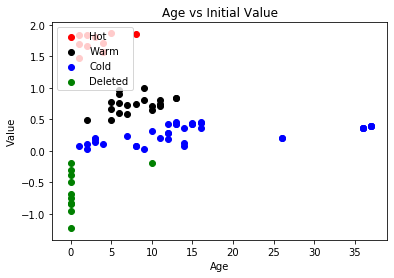

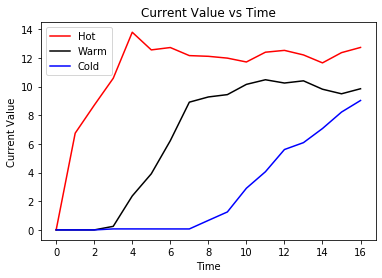

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172]]
2 rows expired in 1    Age  Key Terrain   Queries
0  8.0     0.925635  0.326041
1  5.0     0.935324  0.910381
2  1.0     0.734579  0.334548
3  4.0     0.855807  0.027789
4  3.0     0.904267  0.008123
5  1.0     0.852355  0.771011
6  2.0     0.918408  0.599694
7  2.0     0.835298  0.832838
8  4.0     0.784167  0.401780
9  1.0     0.919857  0.420942
7 rows expired in 2      Age  Key Terrain   Queries
0    6.0     0.603488  0.660240
1   11.0     0.802148  0.322907
2    5.0     0.780488  0.393289
3    6.0     0.966372  0.497740
4   10.0     0.652257  0.304572
5    7.0     0.580125  0.045177
6    7.0     0.730863  0.840734
7    6.0     0.907649  0.674604
8   13.0     0.847308  0.414457
9   11.

Hot    Age  Key Terrain   Queries
0  1.0     0.863809  0.868662
1  1.0     0.718041  0.376951
2  2.0     0.734579  0.334548
3  1.0     0.840703  0.199425
4  6.0     0.935324  0.910381
5  2.0     0.852355  0.771011
6  3.0     0.918408  0.599694
7  3.0     0.835298  0.832838
8  1.0     0.962137  0.422017
9  2.0     0.919857  0.420942
Warm      Age  Key Terrain   Queries
0    7.0     0.603488  0.660240
1    5.0     0.784167  0.401780
2    6.0     0.780488  0.393289
3    7.0     0.966372  0.497740
4    5.0     0.855807  0.027789
5   12.0     0.743340  0.424505
6    8.0     0.730863  0.840734
7    7.0     0.907649  0.674604
8    1.0     0.602743  0.347526
9    4.0     0.904267  0.008123
10   3.0     0.496702  0.025096
11   9.0     0.746936  0.487746
12  10.0     0.995713  0.691129
13  10.0     0.805166  0.662487
14  14.0     0.847308  0.414457
15   9.0     0.925635  0.326041
16   6.0     0.659362  0.465579
17   7.0     0.759382  0.024739
18  12.0     0.802148  0.322907
19  14.0     0.840641

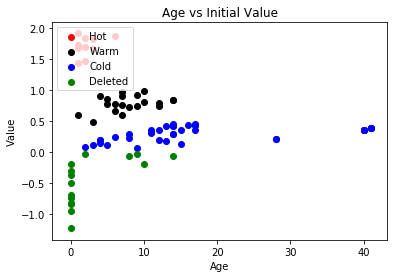

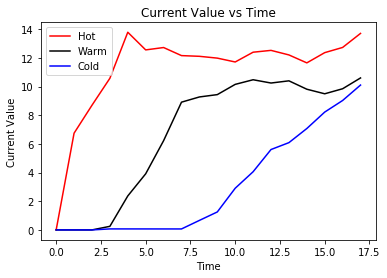

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145]]
1 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.863809  0.868662
1  1.0     0.718041  0.376951
2  2.0     0.734579  0.334548
3  1.0     0.840703  0.199425
4  6.0     0.935324  0.910381
5  2.0     0.852355  0.771011
6  3.0     0.918408  0.599694
7  3.0     0.835298  0.832838
8  1.0     0.962137  0.422017
9  2.0     0.919857  0.420942
6 rows expired in 2      Age  Key Terrain   Queries
0    7.0     0.603488  0.660240
1    5.0     0.784167  0.401780
2    6.0     0.780488  0.393289
3    7.0     0.966372  0.497740
4    5.0     0.855807  0.027789
5   12.0     0.743340

Hot     Age  Key Terrain   Queries
0   2.0     0.863809  0.868662
1   2.0     0.718041  0.376951
2  11.0     0.805166  0.662487
3   2.0     0.840703  0.199425
4   1.0     0.708871  0.801685
5   3.0     0.852355  0.771011
6   4.0     0.918408  0.599694
7   4.0     0.835298  0.832838
8   2.0     0.962137  0.422017
9   3.0     0.919857  0.420942
Warm      Age  Key Terrain   Queries
0    8.0     0.603488  0.660240
1    6.0     0.784167  0.401780
2    7.0     0.780488  0.393289
3    8.0     0.966372  0.497740
4    6.0     0.855807  0.027789
5   15.0     0.840641  0.059758
6    9.0     0.730863  0.840734
7    8.0     0.907649  0.674604
8    2.0     0.602743  0.347526
9    5.0     0.904267  0.008123
10   4.0     0.496702  0.025096
11  10.0     0.746936  0.487746
12   3.0     0.734579  0.334548
13   1.0     0.293911  0.586806
14  13.0     0.743340  0.424505
15  10.0     0.925635  0.326041
16   7.0     0.659362  0.465579
17   8.0     0.759382  0.024739
18  11.0     0.995713  0.691129
19   7.0  

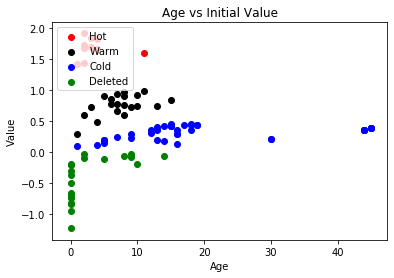

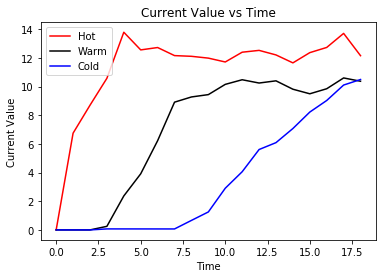

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116]]
1 rows expired in 1     Age  Key Terrain   Queries
0   2.0     0.863809  0.868662
1   2.0     0.718041  0.376951
2  11.0     0.805166  0.662487
3   2.0     0.840703  0.199425
4   1.0     0.708871  0.801685
5   3.0     0.852355  0.771011
6   4.0     0.918408  0.599694
7   4.0     0.835298  0.832838
8   2.0     0.962137  0.422017
9   3.0     0.919857  0.420942
5 rows expired in 2      Age  Key Terrain   Queries
0    8.0     0.603488  0.660240

Cold      Age  Key Terrain   Queries
0   10.0     0.580125  0.045177
1   15.0     0.375549  0.568162
2   13.0     0.652257  0.304572
3   32.0     0.423655  0.645894
4   32.0     0.423655  0.645894
5   14.0     0.718816  0.942839
6   16.0     0.847308  0.414457
7   48.0     0.719389  0.349993
8   17.0     0.265303  0.127294
9   48.0     0.719389  0.349993
10  48.0     0.719389  0.349993
11  49.0     0.791725  0.528895
12  49.0     0.791725  0.528895
13  49.0     0.791725  0.528895
14  19.0     0.715189  0.602763
15  49.0     0.791725  0.528895
16  14.0     0.400510  0.410916
17  19.0     0.891773  0.963663
18  13.0     0.634091  0.577731
19  21.0     0.865805  0.388099
20  18.0     0.577305  0.893718
21  18.0     0.577305  0.893718
22  21.0     0.865805  0.388099
23   1.0     0.333371  0.536116
24  10.0     0.469557  0.911192
25  48.0     0.719389  0.349993
26  16.0     0.919738  0.960766
27   6.0     0.286425  0.069879
28   6.0     0.387650  0.096958
29  16.0     0.862559  0.586277
30 

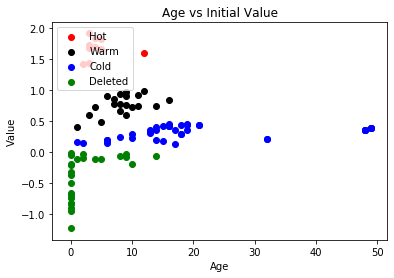

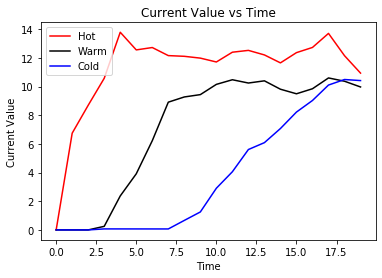

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704]]
3 rows expired in 1     Age  Key Terrain   Queries
0   3.0     0.863809  0.868662
1   3.0     0.718041  0.376951
2  12.0     0.805166  0.662487
3   3.0     0.840703  0.199425
4   2.0     0.708871  0.801685
5   4.0     0.852355  0.771011
6   5.0     0.918408  0.599694
7   5.0     0.835298  0.832838
8   3.

Warm      Age  Key Terrain   Queries
0   10.0     0.603488  0.660240
1    8.0     0.784167  0.401780
2    9.0     0.780488  0.393289
3   10.0     0.966372  0.497740
4    8.0     0.855807  0.027789
5   13.0     0.995713  0.691129
6   13.0     0.805166  0.662487
7   10.0     0.907649  0.674604
8    4.0     0.602743  0.347526
9    7.0     0.904267  0.008123
10   6.0     0.496702  0.025096
11   1.0     0.431450  0.176069
12   5.0     0.734579  0.334548
13  12.0     0.746936  0.487746
14   2.0     0.404176  0.592358
15   6.0     0.835298  0.832838
16   9.0     0.659362  0.465579
17  10.0     0.759382  0.024739
18  12.0     0.925635  0.326041
19   9.0     0.935324  0.910381
Cold      Age  Key Terrain   Queries
0   11.0     0.580125  0.045177
1   16.0     0.375549  0.568162
2   14.0     0.652257  0.304572
3   34.0     0.423655  0.645894
4   34.0     0.423655  0.645894
5   15.0     0.718816  0.942839
6   17.0     0.847308  0.414457
7   52.0     0.719389  0.349993
8    1.0     0.356478  0.59822

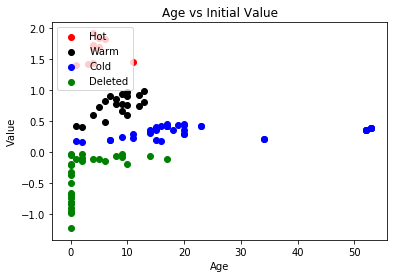

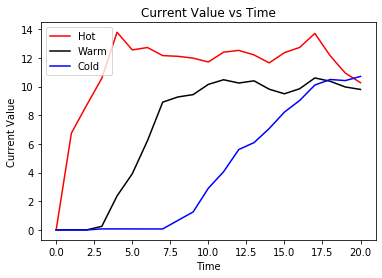

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917]]
4 rows expired in 1     Age  Key Terrain   Queries
0   4.0     0.863809  0.868662
1   4.0     0.718041  0.376951
2   1.0     0.702067  0.894464
3   4.0     0.840703  

Warm      Age  Key Terrain   Queries
0   11.0     0.907649  0.674604
1    9.0     0.784167  0.401780
2   10.0     0.780488  0.393289
3   55.0     0.719389  0.349993
4    9.0     0.855807  0.027789
5   13.0     0.925635  0.326041
6    5.0     0.718041  0.376951
7   12.0     0.730863  0.840734
8    5.0     0.602743  0.347526
9    8.0     0.904267  0.008123
10   7.0     0.496702  0.025096
11   2.0     0.431450  0.176069
12   6.0     0.734579  0.334548
13  11.0     0.966372  0.497740
14   3.0     0.404176  0.592358
15   7.0     0.835298  0.832838
16  10.0     0.659362  0.465579
17   7.0     0.918408  0.599694
18  14.0     0.805166  0.662487
19  10.0     0.935324  0.910381
Cold      Age  Key Terrain   Queries
0   12.0     0.580125  0.045177
1   17.0     0.375549  0.568162
2   15.0     0.652257  0.304572
3   57.0     0.791725  0.528895
4   35.0     0.423655  0.645894
5   16.0     0.718816  0.942839
6   18.0     0.847308  0.414457
7   11.0     0.603488  0.660240
8    2.0     0.356478  0.59822

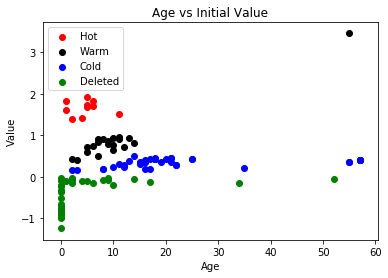

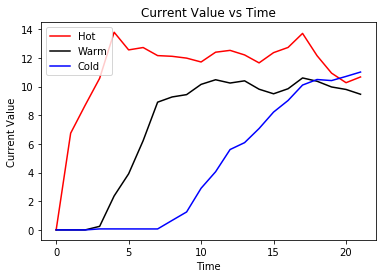

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825]]
6 rows expired in 1    

Cold      Age  Key Terrain   Queries
0   13.0     0.580125  0.045177
1   58.0     0.719389  0.349993
2   16.0     0.652257  0.304572
3    6.0     0.863809  0.868662
4   61.0     0.791725  0.528895
5   17.0     0.718816  0.942839
6   19.0     0.847308  0.414457
7   12.0     0.603488  0.660240
8    3.0     0.356478  0.598223
9   15.0     0.995713  0.691129
10  14.0     0.746936  0.487746
11  58.0     0.719389  0.349993
12  15.0     0.925635  0.326041
13   4.0     0.404176  0.592358
14  22.0     0.715189  0.602763
15  61.0     0.791725  0.528895
16  17.0     0.400510  0.410916
17  22.0     0.891773  0.963663
18  16.0     0.634091  0.577731
19  27.0     0.865805  0.388099
20  24.0     0.577305  0.893718
21  24.0     0.577305  0.893718
22  27.0     0.865805  0.388099
23  58.0     0.719389  0.349993
24  13.0     0.469557  0.911192
25  61.0     0.791725  0.528895
26  19.0     0.919738  0.960766
27  17.0     0.743340  0.424505
28   9.0     0.387650  0.096958
29  19.0     0.862559  0.586277
30 

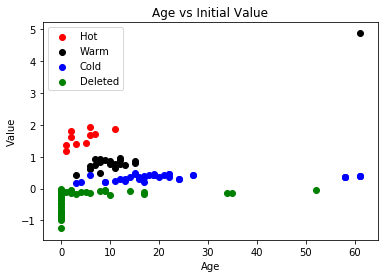

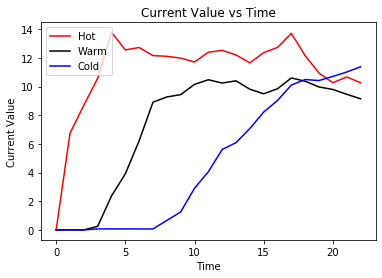

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825], [0.0, 0.574200470678564

Hot     Age  Key Terrain   Queries
0   2.0     0.592831  0.836383
1   2.0     0.689159  0.112075
2   4.0     0.702067  0.894464
3   1.0     0.660276  0.204813
4   1.0     0.706253  0.203490
5   1.0     0.590317  0.974435
6   3.0     0.804783  0.480321
7   1.0     0.718746  0.104664
8  13.0     0.966372  0.497740
9   3.0     0.911641  0.328735
Warm      Age  Key Terrain   Queries
0    8.0     0.919857  0.420942
1    7.0     0.962137  0.422017
2    7.0     0.840703  0.199425
3    6.0     0.708871  0.801685
4   12.0     0.935324  0.910381
5    8.0     0.852355  0.771011
6    7.0     0.718041  0.376951
7   11.0     0.784167  0.401780
8   14.0     0.730863  0.840734
9   10.0     0.904267  0.008123
10  13.0     0.907649  0.674604
11  12.0     0.659362  0.465579
12   8.0     0.734579  0.334548
13  61.0     0.719389  0.349993
14  13.0     0.759382  0.024739
15   9.0     0.835298  0.832838
16  12.0     0.780488  0.393289
17   9.0     0.918408  0.599694
18  17.0     0.925635  0.326041
19  11.0  

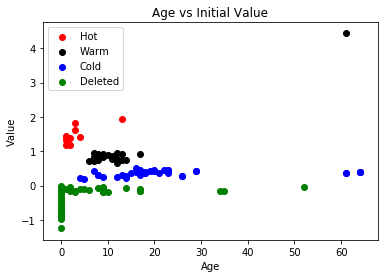

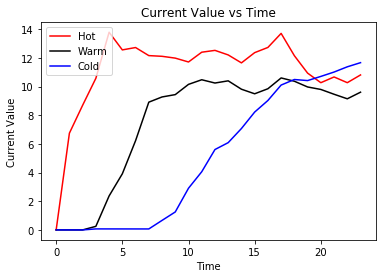

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825], [0.0, 0.574200470678564

Hot     Age  Key Terrain   Queries
0   1.0     0.898647  0.306526
1   3.0     0.689159  0.112075
2  12.0     0.855807  0.027789
3   2.0     0.660276  0.204813
4   2.0     0.706253  0.203490
5   2.0     0.590317  0.974435
6   4.0     0.804783  0.480321
7   2.0     0.718746  0.104664
8   1.0     0.587183  0.456017
9   4.0     0.911641  0.328735
Warm      Age  Key Terrain   Queries
0    9.0     0.919857  0.420942
1    8.0     0.962137  0.422017
2    9.0     0.840703  0.199425
3    7.0     0.708871  0.801685
4    5.0     0.702067  0.894464
5    9.0     0.852355  0.771011
6    8.0     0.718041  0.376951
7    3.0     0.592831  0.836383
8    1.0     0.979181  0.937616
9   14.0     0.966372  0.497740
10   1.0     0.516927  0.184924
11  13.0     0.935324  0.910381
12   9.0     0.734579  0.334548
13  12.0     0.784167  0.401780
14  66.0     0.791725  0.528895
15  10.0     0.835298  0.832838
16  14.0     0.907649  0.674604
17  10.0     0.918408  0.599694
18  11.0     0.904267  0.008123
19  13.0  

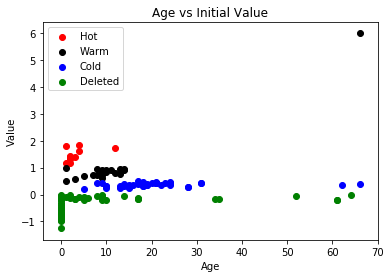

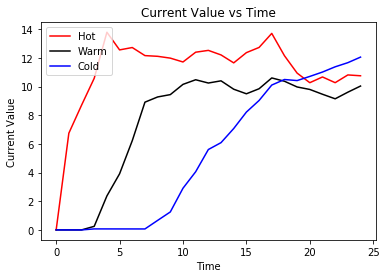

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825], [0.0, 0.574200470678564

Hot     Age  Key Terrain   Queries
0   2.0     0.898647  0.306526
1   1.0     0.786708  0.438797
2   1.0     0.645215  0.162387
3   3.0     0.660276  0.204813
4   3.0     0.706253  0.203490
5   1.0     0.623592  0.349408
6   1.0     0.581926  0.151821
7   3.0     0.718746  0.104664
8  12.0     0.904267  0.008123
9   5.0     0.911641  0.328735
Warm      Age  Key Terrain   Queries
0   10.0     0.919857  0.420942
1    9.0     0.962137  0.422017
2   63.0     0.719389  0.349993
3    8.0     0.708871  0.801685
4    6.0     0.702067  0.894464
5   10.0     0.852355  0.771011
6    9.0     0.718041  0.376951
7    4.0     0.592831  0.836383
8    6.0     0.979181  0.937616
9    3.0     0.590317  0.974435
10   2.0     0.516927  0.184924
11   4.0     0.689159  0.112075
12  10.0     0.734579  0.334548
13   5.0     0.804783  0.480321
14   2.0     0.587183  0.456017
15  11.0     0.835298  0.832838
16  13.0     0.855807  0.027789
17  15.0     0.966372  0.497740
18  14.0     0.935324  0.910381
19  11.0  

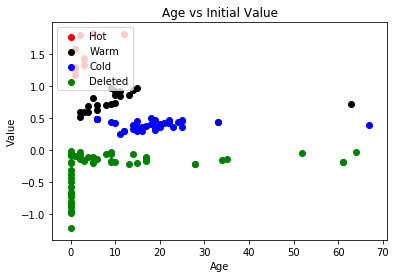

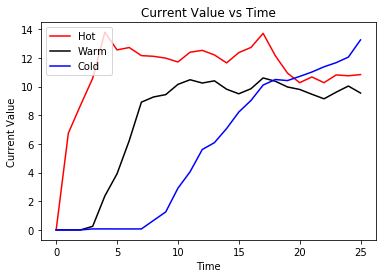

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825], [0.0, 0.574200470678564

Hot     Age  Key Terrain   Queries
0   3.0     0.898647  0.306526
1   2.0     0.786708  0.438797
2   2.0     0.645215  0.162387
3   6.0     0.911641  0.328735
4  12.0     0.918408  0.599694
5   2.0     0.623592  0.349408
6   2.0     0.581926  0.151821
7   4.0     0.718746  0.104664
8   1.0     0.795637  0.856182
9   1.0     0.869731  0.334804
Warm      Age  Key Terrain   Queries
0   15.0     0.935324  0.910381
1   10.0     0.962137  0.422017
2    1.0     0.439696  0.769026
3    9.0     0.708871  0.801685
4   68.0     0.791725  0.528895
5    4.0     0.660276  0.204813
6   10.0     0.718041  0.376951
7    5.0     0.592831  0.836383
8   11.0     0.979181  0.937616
9    4.0     0.590317  0.974435
10   3.0     0.516927  0.184924
11   5.0     0.689159  0.112075
12  13.0     0.904267  0.008123
13   6.0     0.804783  0.480321
14   3.0     0.587183  0.456017
15  11.0     0.919857  0.420942
16  12.0     0.835298  0.832838
17   4.0     0.706253  0.203490
18  11.0     0.852355  0.771011
19  11.0  

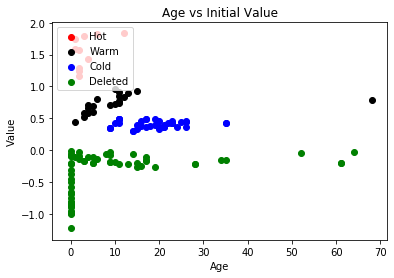

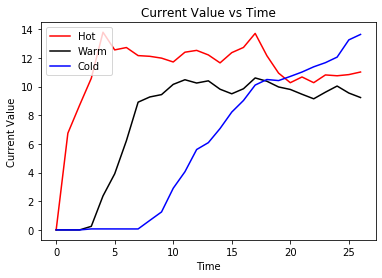

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825], [0.0, 0.574200470678564

Warm      Age  Key Terrain   Queries
0   12.0     0.852355  0.771011
1    1.0     0.382742  0.604660
2    2.0     0.439696  0.769026
3   10.0     0.708871  0.801685
4   13.0     0.918408  0.599694
5    5.0     0.660276  0.204813
6    4.0     0.581926  0.151821
7    6.0     0.592831  0.836383
8   16.0     0.935324  0.910381
9    5.0     0.590317  0.974435
10   4.0     0.516927  0.184924
11   6.0     0.689159  0.112075
12  16.0     0.979181  0.937616
13   7.0     0.804783  0.480321
14   4.0     0.587183  0.456017
15  14.0     0.904267  0.008123
16  12.0     0.919857  0.420942
17   5.0     0.706253  0.203490
18  11.0     0.962137  0.422017
19  13.0     0.835298  0.832838
Cold      Age  Key Terrain   Queries
0   12.0     0.702067  0.894464
1   12.0     0.702067  0.894464
2   21.0     0.652257  0.304572
3   11.0     0.863809  0.868662
4   11.0     0.718041  0.376951
5   22.0     0.718816  0.942839
6   24.0     0.847308  0.414457
7   19.0     0.966372  0.497740
8   16.0     0.979181  0.93761

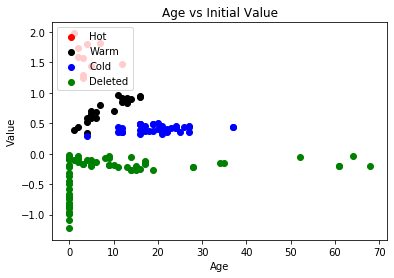

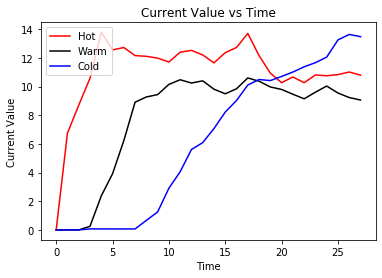

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825], [0.0, 0.574200470678564

Warm      Age  Key Terrain   Queries
0    4.0     0.623592  0.349408
1   15.0     0.904267  0.008123
2   15.0     0.919857  0.420942
3   21.0     0.979181  0.937616
4    4.0     0.645215  0.162387
5    6.0     0.660276  0.204813
6   17.0     0.935324  0.910381
7    7.0     0.592831  0.836383
8    8.0     0.911641  0.328735
9    6.0     0.590317  0.974435
10   5.0     0.516927  0.184924
11   7.0     0.689159  0.112075
12  12.0     0.962137  0.422017
13   8.0     0.804783  0.480321
14   5.0     0.587183  0.456017
15   6.0     0.718746  0.104664
16  13.0     0.852355  0.771011
17   6.0     0.706253  0.203490
18  11.0     0.708871  0.801685
19  14.0     0.918408  0.599694
Cold      Age  Key Terrain   Queries
0   15.0     0.702067  0.894464
1   15.0     0.702067  0.894464
2   15.0     0.919857  0.420942
3   12.0     0.863809  0.868662
4   12.0     0.718041  0.376951
5   23.0     0.718816  0.942839
6   25.0     0.847308  0.414457
7   21.0     0.966372  0.497740
8   21.0     0.979181  0.93761

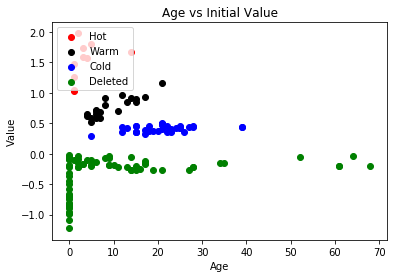

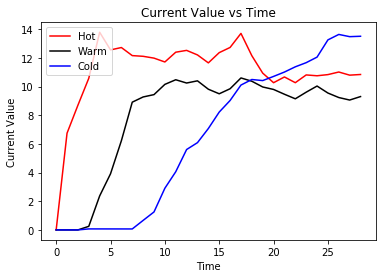

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825], [0.0, 0.574200470678564

Hot     Age  Key Terrain   Queries
0   1.0     0.958324  0.977967
1   5.0     0.786708  0.438797
2   1.0     0.872435  0.680796
3   2.0     0.739098  0.113968
4   3.0     0.990467  0.436962
5   2.0     0.632806  0.866872
6   1.0     0.993944  0.451847
7  15.0     0.918408  0.599694
8   4.0     0.795637  0.856182
9   4.0     0.869731  0.334804
Warm      Age  Key Terrain   Queries
0    5.0     0.623592  0.349408
1    2.0     0.511907  0.033340
2    6.0     0.898647  0.306526
3   15.0     0.835298  0.832838
4    5.0     0.645215  0.162387
5    7.0     0.660276  0.204813
6   16.0     0.904267  0.008123
7   12.0     0.708871  0.801685
8    9.0     0.911641  0.328735
9    7.0     0.590317  0.974435
10   6.0     0.516927  0.184924
11   8.0     0.689159  0.112075
12  14.0     0.852355  0.771011
13   9.0     0.804783  0.480321
14   6.0     0.587183  0.456017
15   7.0     0.718746  0.104664
16   2.0     0.521959  0.469999
17   7.0     0.706253  0.203490
18  18.0     0.935324  0.910381
19  13.0  

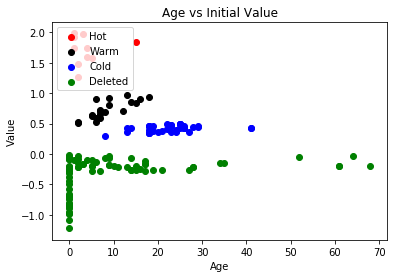

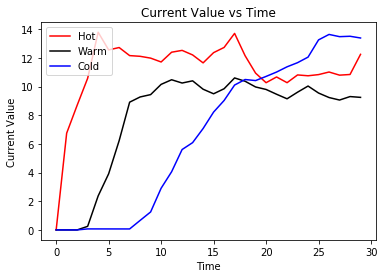

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825], [0.0, 0.574200470678564

Warm      Age  Key Terrain   Queries
0    6.0     0.623592  0.349408
1    3.0     0.511907  0.033340
2    7.0     0.898647  0.306526
3   17.0     0.904267  0.008123
4    6.0     0.645215  0.162387
5   14.0     0.962137  0.422017
6   15.0     0.852355  0.771011
7    3.0     0.632806  0.866872
8   10.0     0.911641  0.328735
9    8.0     0.590317  0.974435
10   7.0     0.516927  0.184924
11   9.0     0.689159  0.112075
12  16.0     0.918408  0.599694
13  10.0     0.804783  0.480321
14   7.0     0.587183  0.456017
15   8.0     0.718746  0.104664
16   3.0     0.521959  0.469999
17   8.0     0.706253  0.203490
18   6.0     0.786708  0.438797
19  16.0     0.835298  0.832838
Cold      Age  Key Terrain   Queries
0   21.0     0.702067  0.894464
1   21.0     0.702067  0.894464
2   21.0     0.919857  0.420942
3   14.0     0.863809  0.868662
4   14.0     0.718041  0.376951
5   14.0     0.708871  0.801685
6   27.0     0.847308  0.414457
7   25.0     0.966372  0.497740
8   29.0     0.979181  0.93761

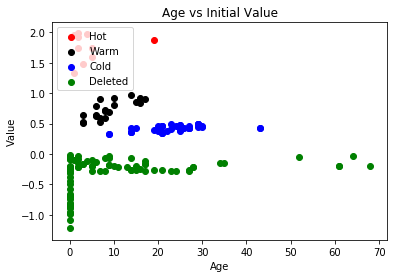

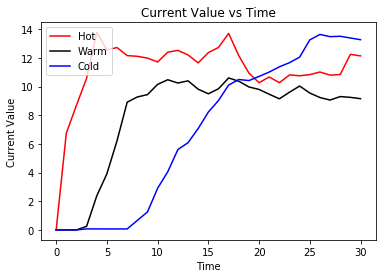

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825], [0.0, 0.574200470678564

Warm      Age  Key Terrain   Queries
0    7.0     0.623592  0.349408
1    4.0     0.511907  0.033340
2    8.0     0.898647  0.306526
3   12.0     0.911641  0.328735
4    7.0     0.645215  0.162387
5    4.0     0.739098  0.113968
6   16.0     0.852355  0.771011
7    4.0     0.632806  0.866872
8    6.0     0.869731  0.334804
9    9.0     0.590317  0.974435
10  11.0     0.804783  0.480321
11  10.0     0.689159  0.112075
12   6.0     0.795637  0.856182
13  17.0     0.918408  0.599694
14   8.0     0.587183  0.456017
15   9.0     0.718746  0.104664
16   4.0     0.521959  0.469999
17   9.0     0.706253  0.203490
18   7.0     0.786708  0.438797
19  15.0     0.962137  0.422017
Cold      Age  Key Terrain   Queries
0   24.0     0.702067  0.894464
1   24.0     0.702067  0.894464
2   24.0     0.919857  0.420942
3   15.0     0.863809  0.868662
4   15.0     0.718041  0.376951
5   16.0     0.708871  0.801685
6   28.0     0.847308  0.414457
7   27.0     0.966372  0.497740
8   33.0     0.979181  0.93761

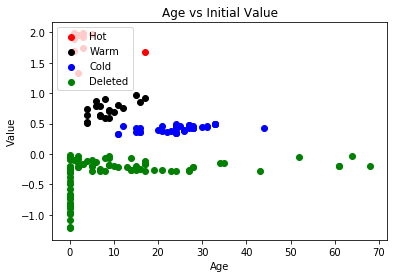

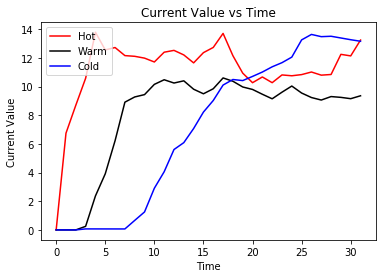

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825], [0.0, 0.574200470678564

Hot     Age  Key Terrain   Queries
0  16.0     0.962137  0.422017
1   3.0     0.980201  0.074215
2   1.0     0.980802  0.440264
3   1.0     0.737104  0.016066
4   1.0     0.867297  0.508758
5   2.0     0.943033  0.261507
6   4.0     0.993944  0.451847
7   1.0     0.915750  0.023800
8   2.0     0.847048  0.733553
9   2.0     0.992069  0.415261
Warm      Age  Key Terrain   Queries
0   18.0     0.918408  0.599694
1    5.0     0.511907  0.033340
2    9.0     0.898647  0.306526
3    3.0     0.665477  0.047100
4    8.0     0.645215  0.162387
5    5.0     0.739098  0.113968
6    4.0     0.872435  0.680796
7    5.0     0.632806  0.866872
8    7.0     0.869731  0.334804
9   14.0     0.911641  0.328735
10   4.0     0.958324  0.977967
11   1.0     0.443100  0.499143
12   7.0     0.795637  0.856182
13  11.0     0.689159  0.112075
14   9.0     0.587183  0.456017
15  10.0     0.718746  0.104664
16   5.0     0.521959  0.469999
17  10.0     0.706253  0.203490
18   8.0     0.786708  0.438797
19   6.0  

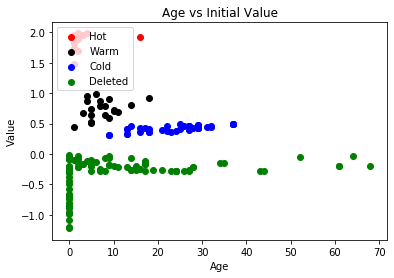

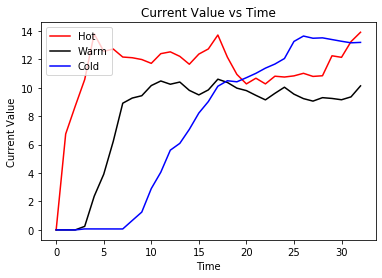

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825], [0.0, 0.574200470678564

Hot     Age  Key Terrain   Queries
0   1.0     0.914535  0.265477
1   4.0     0.980201  0.074215
2   2.0     0.980802  0.440264
3   1.0     0.855108  0.857132
4   2.0     0.867297  0.508758
5   3.0     0.943033  0.261507
6   1.0     0.717362  0.157763
7   2.0     0.915750  0.023800
8  11.0     0.706253  0.203490
9   3.0     0.992069  0.415261
Warm      Age  Key Terrain   Queries
0    5.0     0.993944  0.451847
1   16.0     0.911641  0.328735
2   10.0     0.898647  0.306526
3    4.0     0.665477  0.047100
4    9.0     0.645215  0.162387
5    6.0     0.739098  0.113968
6    5.0     0.872435  0.680796
7    6.0     0.632806  0.866872
8   12.0     0.869731  0.334804
9    1.0     0.621085  0.206096
10   5.0     0.958324  0.977967
11   2.0     0.443100  0.499143
12   8.0     0.795637  0.856182
13   2.0     0.737104  0.016066
14   1.0     0.492426  0.244744
15   3.0     0.847048  0.733553
16  12.0     0.689159  0.112075
17  17.0     0.962137  0.422017
18   9.0     0.786708  0.438797
19   7.0  

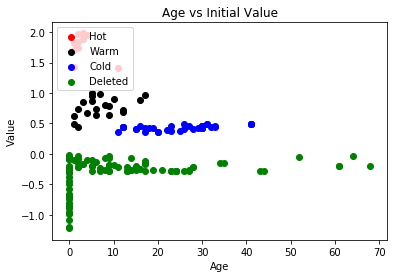

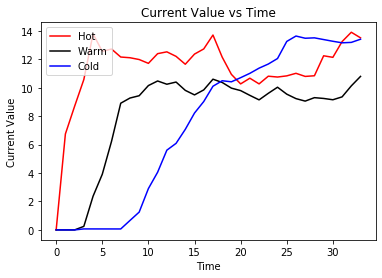

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825], [0.0, 0.574200470678564

Hot     Age  Key Terrain   Queries
0   2.0     0.914535  0.265477
1  18.0     0.962137  0.422017
2   3.0     0.980802  0.440264
3   2.0     0.855108  0.857132
4   3.0     0.867297  0.508758
5   4.0     0.943033  0.261507
6   2.0     0.717362  0.157763
7   3.0     0.915750  0.023800
8   1.0     0.941224  0.560794
9   4.0     0.992069  0.415261
Warm      Age  Key Terrain   Queries
0    6.0     0.993944  0.451847
1   12.0     0.898647  0.306526
2    1.0     0.518710  0.860447
3    5.0     0.665477  0.047100
4   10.0     0.645215  0.162387
5    7.0     0.739098  0.113968
6    6.0     0.872435  0.680796
7    7.0     0.632806  0.866872
8    5.0     0.980201  0.074215
9    2.0     0.621085  0.206096
10   6.0     0.958324  0.977967
11  13.0     0.689159  0.112075
12   9.0     0.795637  0.856182
13   3.0     0.737104  0.016066
14   2.0     0.492426  0.244744
15   4.0     0.847048  0.733553
16  12.0     0.706253  0.203490
17  18.0     0.911641  0.328735
18  10.0     0.786708  0.438797
19   8.0  

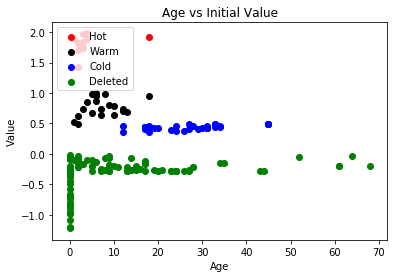

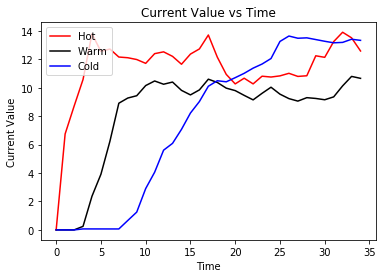

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825], [0.0, 0.574200470678564

Warm      Age  Key Terrain   Queries
0    7.0     0.993944  0.451847
1    1.0     0.473647  0.691202
2    2.0     0.518710  0.860447
3    6.0     0.665477  0.047100
4    3.0     0.717362  0.157763
5   11.0     0.786708  0.438797
6    7.0     0.872435  0.680796
7    8.0     0.632806  0.866872
8    6.0     0.980201  0.074215
9    3.0     0.621085  0.206096
10   7.0     0.958324  0.977967
11   5.0     0.943033  0.261507
12  10.0     0.795637  0.856182
13   4.0     0.737104  0.016066
14   3.0     0.492426  0.244744
15   5.0     0.847048  0.733553
16  14.0     0.689159  0.112075
17  11.0     0.645215  0.162387
18  14.0     0.898647  0.306526
19   9.0     0.990467  0.436962
Cold      Age  Key Terrain   Queries
0   21.0     0.835298  0.832838
1   22.0     0.869731  0.334804
2   36.0     0.919857  0.420942
3   19.0     0.863809  0.868662
4   19.0     0.718041  0.376951
5   22.0     0.869731  0.334804
6   32.0     0.847308  0.414457
7   35.0     0.966372  0.497740
8   49.0     0.979181  0.93761

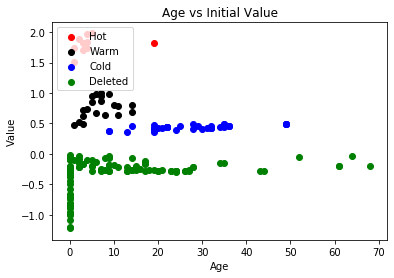

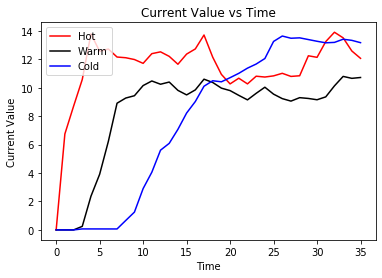

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825], [0.0, 0.574200470678564

Cold      Age  Key Terrain   Queries
0   22.0     0.835298  0.832838
1   27.0     0.869731  0.334804
2   39.0     0.919857  0.420942
3   20.0     0.863809  0.868662
4   11.0     0.795637  0.856182
5   27.0     0.869731  0.334804
6   33.0     0.847308  0.414457
7   37.0     0.966372  0.497740
8   53.0     0.979181  0.937616
9   29.0     0.995713  0.691129
10  20.0     0.962137  0.422017
11  39.0     0.919857  0.420942
12  30.0     0.925635  0.326041
13  53.0     0.979181  0.937616
14  39.0     0.919857  0.420942
15  53.0     0.979181  0.937616
16  27.0     0.869731  0.334804
17  36.0     0.891773  0.963663
18  37.0     0.966372  0.497740
19  11.0     0.739098  0.113968
20  25.0     0.780488  0.393289
21  27.0     0.869731  0.334804
22  21.0     0.804783  0.480321
23  29.0     0.805166  0.662487
24  53.0     0.979181  0.937616
25  27.0     0.869731  0.334804
26  33.0     0.919738  0.960766
27  21.0     0.804783  0.480321
28  21.0     0.840703  0.199425
29  33.0     0.862559  0.586277
30 

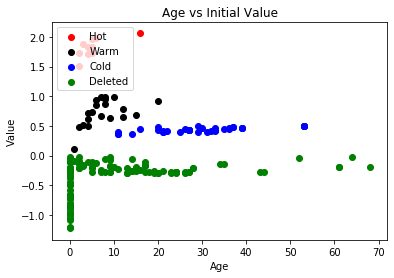

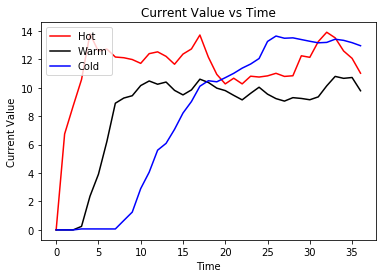

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825], [0.0, 0.574200470678564

Cold      Age  Key Terrain   Queries
0   23.0     0.835298  0.832838
1   32.0     0.869731  0.334804
2   42.0     0.919857  0.420942
3   21.0     0.863809  0.868662
4   12.0     0.795637  0.856182
5   32.0     0.869731  0.334804
6   34.0     0.847308  0.414457
7   39.0     0.966372  0.497740
8    9.0     0.665477  0.047100
9   30.0     0.995713  0.691129
10  21.0     0.962137  0.422017
11  42.0     0.919857  0.420942
12  31.0     0.925635  0.326041
13   9.0     0.665477  0.047100
14  42.0     0.919857  0.420942
15  15.0     0.786708  0.438797
16  32.0     0.869731  0.334804
17  37.0     0.891773  0.963663
18  39.0     0.966372  0.497740
19  13.0     0.739098  0.113968
20  26.0     0.780488  0.393289
21  32.0     0.869731  0.334804
22  23.0     0.804783  0.480321
23  30.0     0.805166  0.662487
24  15.0     0.786708  0.438797
25  32.0     0.869731  0.334804
26  34.0     0.919738  0.960766
27  23.0     0.804783  0.480321
28  22.0     0.840703  0.199425
29  34.0     0.862559  0.586277
30 

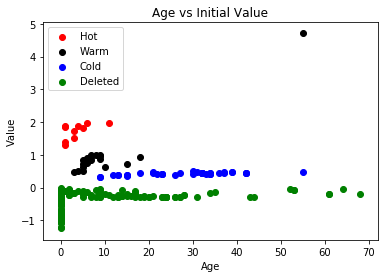

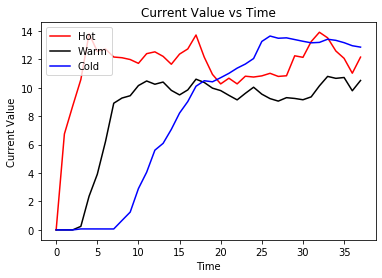

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825], [0.0, 0.574200470678564

Hot     Age  Key Terrain   Queries
0  19.0     0.898647  0.306526
1   4.0     0.867367  0.154931
2   2.0     0.924124  0.865848
3   1.0     0.861084  0.521756
4   2.0     0.945914  0.542214
5   2.0     0.654693  0.062995
6   4.0     0.751496  0.830937
7   2.0     0.702943  0.786632
8   5.0     0.941224  0.560794
9   1.0     0.728417  0.058075
Warm      Age  Key Terrain   Queries
0   14.0     0.993944  0.451847
1   11.0     0.632806  0.866872
2    5.0     0.518710  0.860447
3   12.0     0.990467  0.436962
4    6.0     0.717362  0.157763
5    1.0     0.492422  0.002078
6   10.0     0.872435  0.680796
7    1.0     0.418107  0.306464
8    9.0     0.980201  0.074215
9    6.0     0.621085  0.206096
10  10.0     0.958324  0.977967
11   8.0     0.943033  0.261507
12   6.0     0.855108  0.857132
13   7.0     0.737104  0.016066
14   7.0     0.980802  0.440264
15   8.0     0.847048  0.733553
16   7.0     0.867297  0.508758
17   8.0     0.992069  0.415261
18   6.0     0.914535  0.265477
19   7.0  

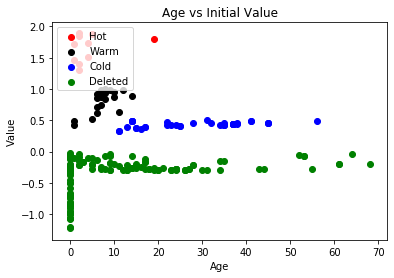

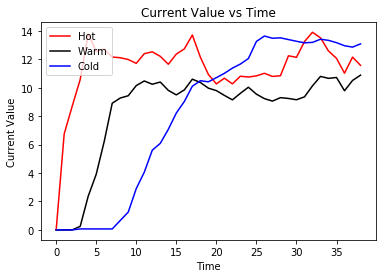

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825], [0.0, 0.574200470678564

Cold      Age  Key Terrain   Queries
0   25.0     0.835298  0.832838
1   42.0     0.869731  0.334804
2   14.0     0.990467  0.436962
3   23.0     0.863809  0.868662
4   14.0     0.795637  0.856182
5   42.0     0.869731  0.334804
6   36.0     0.847308  0.414457
7   43.0     0.966372  0.497740
8   13.0     0.665477  0.047100
9   32.0     0.995713  0.691129
10  23.0     0.962137  0.422017
11  12.0     0.632806  0.866872
12  33.0     0.925635  0.326041
13  13.0     0.665477  0.047100
14  46.0     0.919857  0.420942
15  19.0     0.786708  0.438797
16  42.0     0.869731  0.334804
17  39.0     0.891773  0.963663
18  43.0     0.966372  0.497740
19  17.0     0.739098  0.113968
20  19.0     0.993944  0.451847
21  42.0     0.869731  0.334804
22  27.0     0.804783  0.480321
23  19.0     0.993944  0.451847
24  19.0     0.786708  0.438797
25  42.0     0.869731  0.334804
26  36.0     0.919738  0.960766
27  27.0     0.804783  0.480321
28  24.0     0.840703  0.199425
29  36.0     0.862559  0.586277
30 

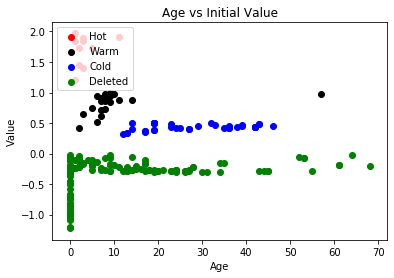

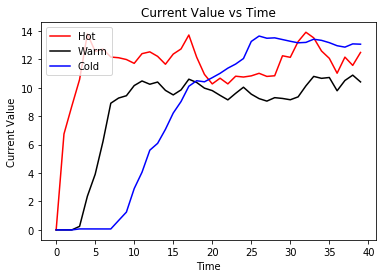

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825], [0.0, 0.574200470678564

Hot     Age  Key Terrain   Queries
0  11.0     0.980201  0.074215
1   1.0     0.706249  0.451151
2   4.0     0.924124  0.865848
3   3.0     0.861084  0.521756
4   4.0     0.945914  0.542214
5   1.0     0.641525  0.567093
6   2.0     0.986902  0.364003
7   1.0     0.928443  0.507159
8   2.0     0.924189  0.149609
9   3.0     0.728417  0.058075
Warm      Age  Key Terrain   Queries
0   16.0     0.990467  0.436962
1    6.0     0.751496  0.830937
2   12.0     0.872435  0.680796
3    4.0     0.702943  0.786632
4    8.0     0.717362  0.157763
5    2.0     0.602982  0.257750
6    4.0     0.654693  0.062995
7   12.0     0.958324  0.977967
8    1.0     0.569727  0.544908
9    8.0     0.621085  0.206096
10   7.0     0.941224  0.560794
11  10.0     0.943033  0.261507
12   8.0     0.855108  0.857132
13   9.0     0.737104  0.016066
14   9.0     0.980802  0.440264
15  10.0     0.847048  0.733553
16   9.0     0.867297  0.508758
17  10.0     0.992069  0.415261
18   8.0     0.914535  0.265477
19   9.0  

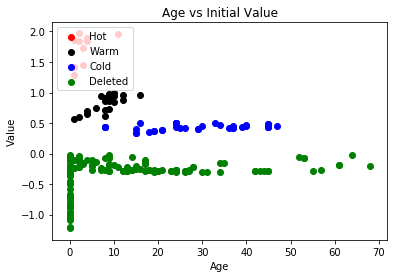

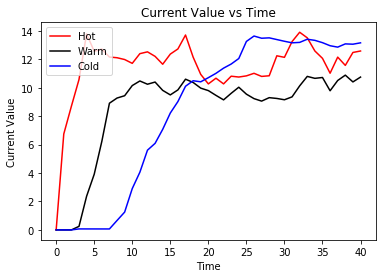

[[0.0, 0.7405720869801959], [0.0, 0.49543686700118383], [0.0, 0.948799499085104], [0.0, 0.19200338425545804], [0.0, 0.8387760547482249], [10.0, 0.19157290325677864], [0.0, 0.30995207639140143], [0.0, 0.37359871734125083], [0.0, 0.6909624444299635], [0.0, 0.8186666042940927], [0.0, 1.2247624074842172], [9.0, 0.030332769925284588], [2.0, 0.03236408012034994], [14.0, 0.06160158222198117], [8.0, 0.06610446632428145], [0.0, 0.21086308939874698], [0.0, 0.6573805312964444], [9.0, 0.06789332868556192], [2.0, 0.08484913386781022], [5.0, 0.10425067793493116], [1.0, 0.10010857471802892], [0.0, 0.8969492972771382], [4.0, 0.1086738188573868], [0.0, 0.01896265294963495], [0.0, 0.050739695305021704], [0.0, 0.9790622664199408], [0.0, 0.8089223024362043], [17.0, 0.11181781580031552], [6.0, 0.13483180069309061], [2.0, 0.14403129055276917], [0.0, 0.08105147469442792], [0.0, 0.08571100935686232], [0.0, 0.08571100935686232], [34.0, 0.15051464245982704], [52.0, 0.049956419665185825], [0.0, 0.574200470678564

In [3]:
env.__myinit__(env_config)
np.random.seed(0)

# Variable initialization for manual looping
loop = 0

# Variables for keeping track of total values over time
vals_plot = [[0],[0],[0]]
t = 0

for q in np.arange(40):
    # New batch of 5 lines, here represented by 5 random values
    batch = pd.read_csv("dns.log",header = 0)
    vals = pd.DataFrame(np.random.random((5,3)),columns=['Age','Key Terrain','Queries'])
    vals['Age'] = 0
    val_tot = vals.drop(['Age'],axis=1).sum(axis=1).values
    rplan = np.hstack((np.mgrid[0:5, 1:4][1].astype(int),np.zeros(5).reshape(-1,1).astype(int)))
    ind = np.zeros(5).astype(int)
    loop += 5
    db = dataBatch(batch,vals,val_tot,ind,rplan)

    toy_agents.batch_load(env, db, 100)
    t += 1
    env.render(out=0)
    clr = ['r','k','b']
    sub = plt.subplot()
    sub.set_title('Current Value vs Time')
    sub.set_xlabel('Time')
    sub.set_ylabel('Current Value')
    for i in np.arange(env.num_ds):
        vals_plot[i].append(sum(np.nan_to_num(env.ds[env.names[i+1]].dataBatch.get('val_tot'))))
        sub.plot(np.arange(t+1),vals_plot[i], c = clr[i], label = env.names[i+1])

    sub.legend(loc=2)
    plt.show()

    #env.render(out=1)
    print(env.del_val)

## Static Policy

0 rows expired in 3     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN         NaN     NaN
16  NaN         NaN     NaN
17  NaN         NaN     NaN
18  NaN         NaN     NaN
19  NaN         NaN     NaN
20  NaN         NaN     NaN
21  NaN         NaN     NaN
22  NaN         NaN     NaN
23  NaN         NaN     NaN
24  NaN         NaN     NaN
25  NaN         NaN     NaN
26  NaN         NaN     NaN
27  NaN         NaN     NaN
28  NaN         NaN     NaN
29  NaN         NaN     NaN
30  NaN         NaN     NaN
31  NaN         NaN     NaN
32  NaN         NaN     NaN
33  NaN         NaN     NaN


/Users/afitts/projects/MAP_bro/gym_map_bro/src/toy_agents.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = 1./np.log10(i+1.)


Cold is full. kicking out nan
Colds val_tots are [0.35759468318620974, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
Hot is full. kicking out nan
Hots val_tots are [0.8473095986778094, nan, nan, nan, nan, nan, nan, nan, nan, nan]
Hot is full. kicking out nan
Hots val_tots are [0.8473095986778094, 1.7835460015641595, nan, nan, nan, nan, nan, nan, nan, nan]
Hot is full. kicking out nan
Hots val_tots are [0.8473095986778094, 1.7835460015641595, 1.5834500761653292, nan, nan, nan, nan, nan, nan, nan]
Hot is full. kicking out nan
Hots val_tots are [0.8473095986778094, 1.7835460015641595, 1.5834500761653292, 1.851193276585322, nan, nan, nan, nan, nan, nan]
Hot    Age  Key Terrain   Queries
0  1.0     0.423655  0.645894
1  1.0     0.891773  0.963663
2  1.0     0.791725  0.528895
3  1.0     0.925597  0.071036
4  NaN          NaN       NaN
5  NaN   

/Users/afitts/projects/MAP_bro/gym_map_bro/src/data.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.batch[i].val[0] += 1


Cold     Age  Key Terrain   Queries
0   1.0     0.715189  0.602763
1   NaN          NaN       NaN
2   NaN          NaN       NaN
3   NaN          NaN       NaN
4   NaN          NaN       NaN
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN       NaN
25  NaN          NaN       NaN
26  NaN          NaN       NaN
27  NaN          NaN       NaN
28  NaN          NaN       NaN
29  NaN          NaN       NaN
30  NaN          NaN       NaN
31 

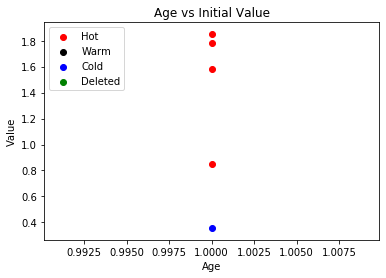

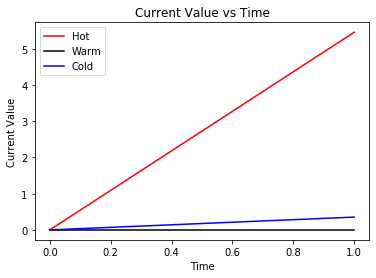

[]
0 rows expired in 3     Age  Key Terrain   Queries
0   1.0     0.715189  0.602763
1   NaN          NaN       NaN
2   NaN          NaN       NaN
3   NaN          NaN       NaN
4   NaN          NaN       NaN
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN       NaN
25  NaN          NaN       NaN
26  NaN          NaN       NaN
27  NaN          NaN       NaN
28  NaN          NaN       NaN
29  NaN          NaN       NaN
30  NaN         

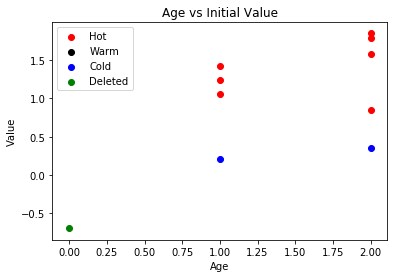

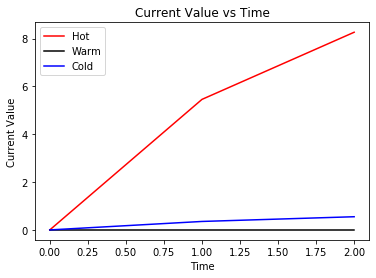

[[0.0, 0.6928434773474355]]
0 rows expired in 3     Age  Key Terrain   Queries
0   2.0     0.715189  0.602763
1   1.0     0.405942  0.024313
2   NaN          NaN       NaN
3   NaN          NaN       NaN
4   NaN          NaN       NaN
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN       NaN
25  NaN          NaN       NaN
26  NaN          NaN       NaN
27  NaN          NaN       NaN
28  NaN          NaN       NaN
29  NaN          NaN  

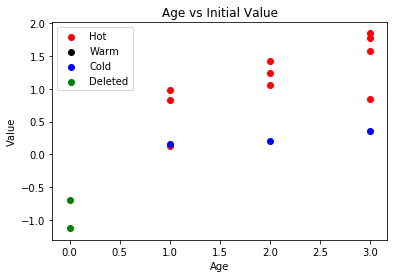

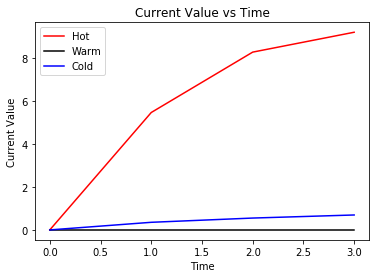

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018]]
0 rows expired in 3     Age  Key Terrain   Queries
0   3.0     0.715189  0.602763
1   2.0     0.405942  0.024313
2   1.0     0.300189  0.266788
3   NaN          NaN       NaN
4   NaN          NaN       NaN
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN       NaN
25  NaN          NaN       NaN
26  NaN          NaN       NaN
27  NaN          NaN       NaN
28  NaN          NaN      

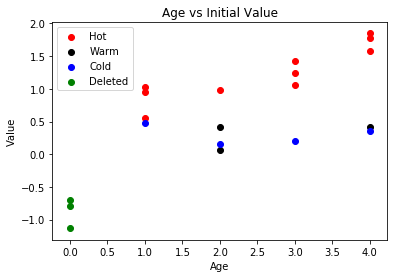

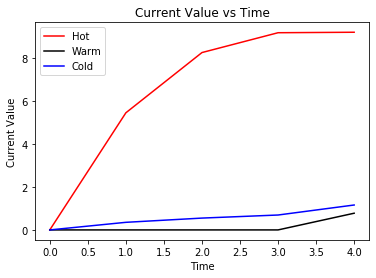

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685]]
0 rows expired in 3     Age  Key Terrain   Queries
0   4.0     0.715189  0.602763
1   3.0     0.405942  0.024313
2   2.0     0.300189  0.266788
3   1.0     0.956942  0.666005
4   NaN          NaN       NaN
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN       NaN
25  NaN          NaN       NaN
26  NaN          NaN       NaN
27  NaN          NaN       NaN

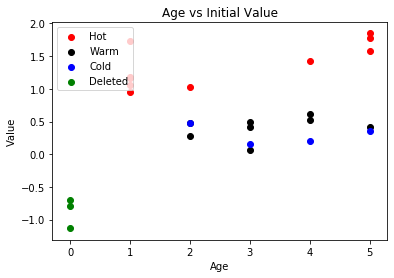

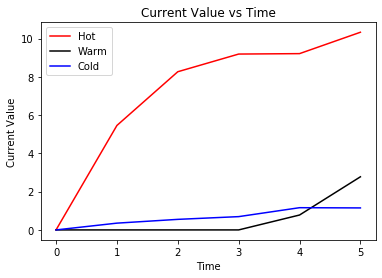

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685]]
0 rows expired in 3     Age  Key Terrain   Queries
0   5.0     0.715189  0.602763
1   4.0     0.405942  0.024313
2   3.0     0.300189  0.266788
3   2.0     0.956942  0.666005
4   NaN          NaN       NaN
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN       NaN
25  NaN          NaN       NaN
26  NaN          NaN       NaN
27  NaN          NaN       NaN

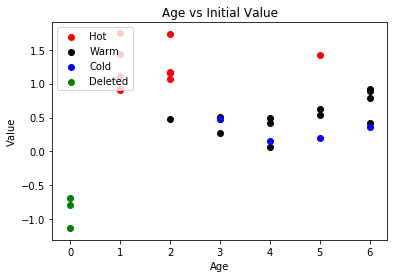

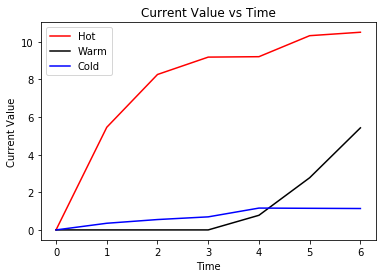

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685]]
0 rows expired in 3     Age  Key Terrain   Queries
0   6.0     0.715189  0.602763
1   5.0     0.405942  0.024313
2   4.0     0.300189  0.266788
3   3.0     0.956942  0.666005
4   NaN          NaN       NaN
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN       NaN
25  NaN          NaN       NaN
26  NaN          NaN       NaN
27  NaN          NaN       NaN

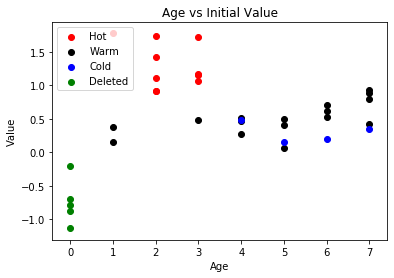

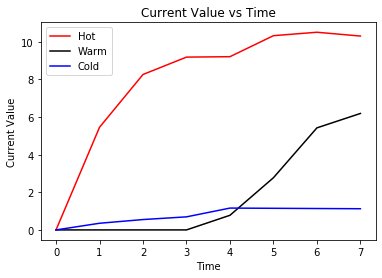

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826]]
0 rows expired in 3     Age  Key Terrain   Queries
0   7.0     0.715189  0.602763
1   6.0     0.405942  0.024313
2   5.0     0.300189  0.266788
3   4.0     0.956942  0.666005
4   NaN          NaN       NaN
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN       NaN
25  NaN          NaN       NaN
26  NaN 

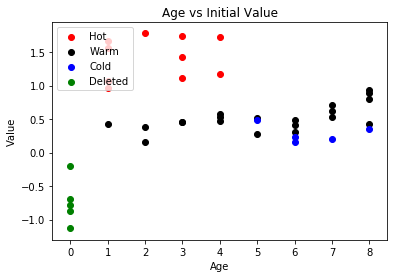

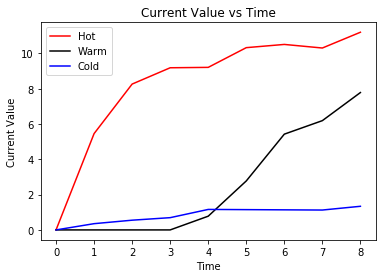

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826]]
0 rows expired in 3     Age  Key Terrain   Queries
0   8.0     0.715189  0.602763
1   7.0     0.405942  0.024313
2   6.0     0.300189  0.266788
3   5.0     0.956942  0.666005
4   6.0     0.474885  0.435883
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN       NaN
25  NaN          NaN       NaN
26  NaN 

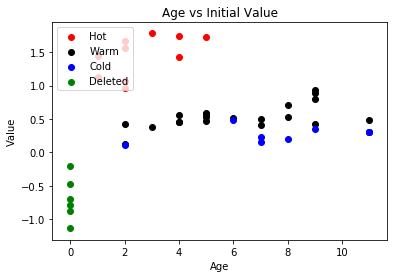

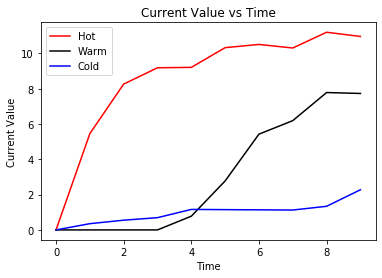

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545]]
0 rows expired in 3      Age  Key Terrain   Queries
0    9.0     0.715189  0.602763
1    8.0     0.405942  0.024313
2    7.0     0.300189  0.266788
3    6.0     0.956942  0.666005
4    7.0     0.474885  0.435883
5   11.0     0.622231  0.279068
6   11.0     0.622231  0.279068
7   11.0     0.622231  0.279068
8    2.0     0.232566  0.858420
9    NaN          NaN       NaN
10   NaN          NaN       NaN
11   NaN          NaN       NaN
12   NaN          NaN       NaN
13   NaN          NaN       NaN
14   NaN          NaN       NaN
15   NaN          NaN       NaN
16   NaN          NaN       NaN
17   NaN          NaN       NaN
18   NaN          NaN       NaN
19   NaN          NaN       NaN
20   NaN          NaN       NaN
21   NaN          NaN       NaN
22   NaN          NaN       NaN
23   NaN          NaN       NaN
24   NaN         

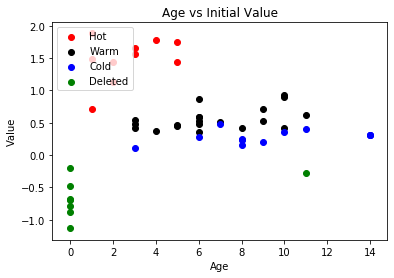

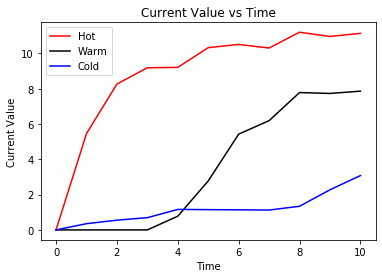

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892]]
0 rows expired in 3      Age  Key Terrain   Queries
0   10.0     0.715189  0.602763
1    9.0     0.405942  0.024313
2    8.0     0.300189  0.266788
3    7.0     0.956942  0.666005
4    8.0     0.474885  0.435883
5   14.0     0.622231  0.279068
6   14.0     0.622231  0.279068
7   14.0     0.622231  0.279068
8    3.0     0.232566  0.858420
9    8.0     0.492632  0.345138
10  11.0     0.791725  0.528895
11   6.0     0.558731  0.330617
12   NaN          NaN       NaN
13   NaN          NaN       NaN
14   NaN          NaN       NaN
15   NaN          NaN       NaN
16   NaN          NaN       NaN
17   NaN          NaN       NaN
18   NaN          NaN       NaN
19   NaN          NaN       NaN
20   NaN          NaN       NaN
21   NaN          NaN       NaN
22   NaN          NaN     

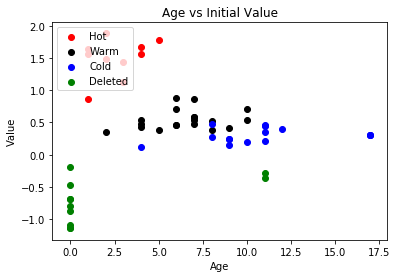

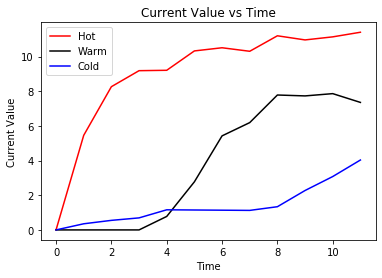

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569]]
0 rows expired in 3      Age  Key Terrain   Queries
0   11.0     0.715189  0.602763
1   10.0     0.405942  0.024313
2    9.0     0.300189  0.266788
3    8.0     0.956942  0.666005
4    9.0     0.474885  0.435883
5   17.0     0.622231  0.279068
6   17.0     0.622231  0.279068
7   17.0     0.622231  0.279068
8    4.0     0.232566  0.858420
9    9.0     0.492632  0.345138
10  12.0     0.791725  0.528895
11   8.0     0.558731  0.330617
12  11.0     0.423655  0.645894
13  11.0     0.891773  0.963663
14  11.0     0.925597  0.071036
15   NaN          NaN       NaN
16   NaN          NaN       NaN
17   NaN          NaN       NaN
18   NaN          NaN       NaN
19   NaN          NaN       NaN
20   NaN 

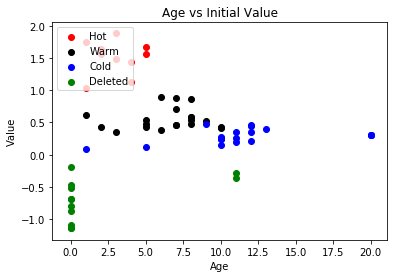

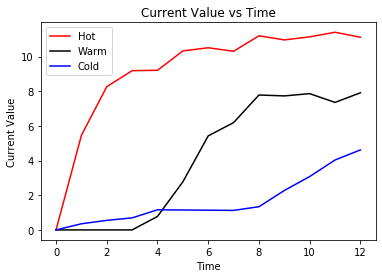

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584]]
0 rows expired in 3      Age  Key Terrain   Queries
0   12.0     0.715189  0.602763
1   11.0     0.405942  0.024313
2   10.0     0.300189  0.266788
3    9.0     0.956942  0.666005
4   10.0     0.474885  0.435883
5   20.0     0.622231  0.279068
6   20.0     0.622231  0.279068
7   20.0     0.622231  0.279068
8    5.0     0.232566  0.858420
9   10.0     0.492632  0.345138
10  13.0     0.791725  0.528895
11  10.0     0.558731  0.330617
12  12.0     0.423655  0.645894
13  12.0     0.891773  0.963663
14  12.0     0.925597  0.071036
15  11.0     0.530537  0.922111
16  11.0     0.710337  0.007884
17   1.0     0.174370  0.900352
18   NaN          NaN       NaN
19   NaN      

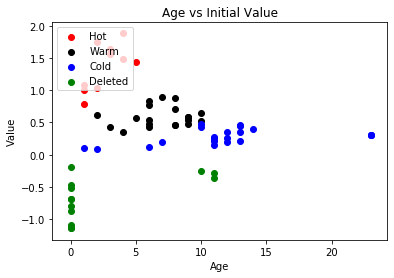

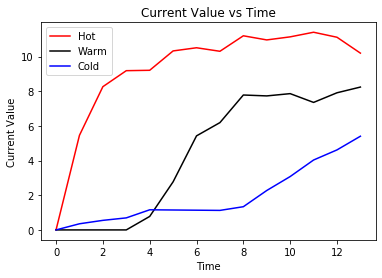

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489]]
0 rows expired in 3      Age  Key Terrain   Queries
0   13.0     0.715189  0.602763
1   12.0     0.405942  0.024313
2   11.0     0.300189  0.266788
3   10.0     0.956942  0.666005
4   11.0     0.474885  0.435883
5   23.0     0.622231  0.279068
6   23.0     0.622231  0.279068
7   23.0     0.622231  0.279068
8    6.0     0.232566  0.858420
9   11.0     0.492632  0.345138
10  14.0     0.791725  0.528895
11  11.0     0.558731  0.330617
12  13.0     0.423655  0.645894
13  13.0     0.891773  0.963663
14  13.0     0.925597  0.071036
15  12.0     0.530537  0.922111
16  12.0     0.710337  0.007884
17   2.0     0.174370  0.900352
18  11.0     0.413

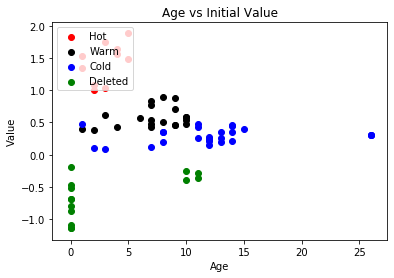

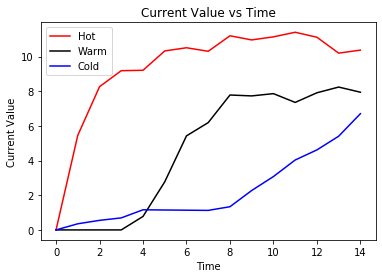

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823]]
0 rows expired in 3      Age  Key Terrain   Queries
0   14.0     0.715189  0.602763
1   13.0     0.405942  0.024313
2   12.0     0.300189  0.266788
3   11.0     0.956942  0.666005
4   12.0     0.474885  0.435883
5   26.0     0.622231  0.279068
6   26.0     0.622231  0.279068
7   26.0     0.622231  0.279068
8    7.0     0.232566  0.858420
9   12.0     0.492632  0.345138
10  15.0     0.791725  0.528895
11  12.0     0.558731  0.330617
12  14.0     0.423655  0.645894
13  14.0     0.891773  0.963663
14  14.0     0.925597  0.071036
15  13.0     0.530537  0.922111
16  13.0     0.710337  0.007884
17   3.0     0.174370

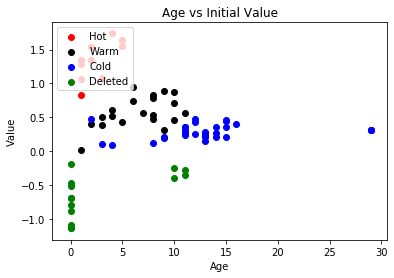

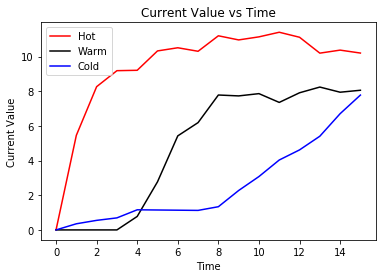

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823]]
0 rows expired in 3      Age  Key Terrain   Queries
0   15.0     0.715189  0.602763
1   14.0     0.405942  0.024313
2   13.0     0.300189  0.266788
3   12.0     0.956942  0.666005
4   13.0     0.474885  0.435883
5   29.0     0.622231  0.279068
6   29.0     0.622231  0.279068
7   29.0     0.622231  0.279068
8    8.0     0.232566  0.858420
9   13.0     0.492632  0.345138
10  16.0     0.791725  0.528895
11  13.0     0.558731  0.330617
12  15.0     0.423655  0.645894
13  15.0     0.891773  0.963663
14  15.0     0.925597  0.071036
15  14.0     0.530537  0.922111
16  14.0     0.710337  0.007884
17   4.0     0.174370

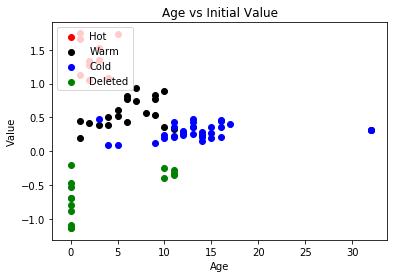

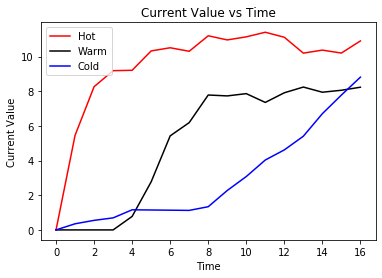

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986]]
0 rows expired in 3      Age  Key Terrain   Queries
0   16.0     0.715189  0.602763
1   15.0     0.405942  0.024313
2   14.0     0.300189  0.266788
3   13.0     0.956942  0.666005
4   14.0     0.474885  0.435883
5   32.0     0.622231  0.279068
6   32.0     0.622231  0.279068
7   32.0     0.622231  0.279068
8    9.0     0.232566  0.858420
9   14.0     0.492632  0.345138
10  17.0     0.791725  0.528895
11  14.0     0.558731  0.330617
12  16.0     0.423655  0.645894
13  16.0     0.891773  0.963663
14  16.0     0.925597  0.071036
15  15.0     0.530537  0.922111
16  15.0     0.710337  0.

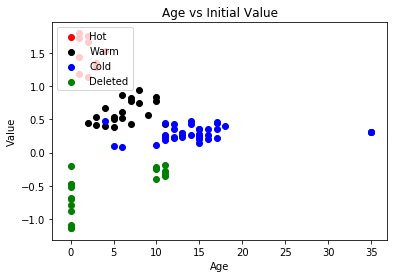

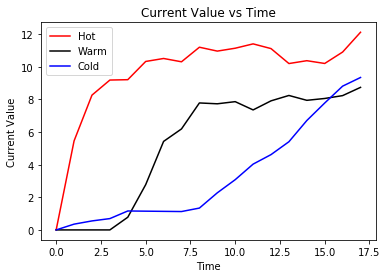

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308]]
0 rows expired in 3      Age  Key Terrain   Queries
0   17.0     0.715189  0.602763
1   16.0     0.405942  0.024313
2   15.0     0.300189  0.266788
3   14.0     0.956942  0.666005
4   15.0     0.474885  0.435883
5   35.0     0.622231  0.279068
6   35.0     0.622231  0.279068
7   35.0     0.622231  0.279068
8   10.0     0.232566  0.858420
9   15.0     0.492632  0.345138
10  18.0     0.791725  0.528895
11  15.0     0.558731  0.330617
12  17.0     0.423655  0.645894
13  17.0     0.891773  0.963663
14  1

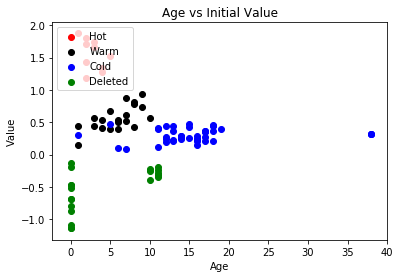

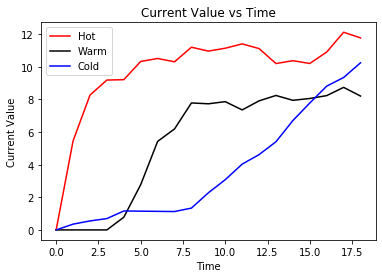

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309]]
0 rows expired in 3      Age  Key Terrain   Queries
0   18.0     0.715189  0.602763
1   17.0     0.405942  0.024313
2   16.0     0.300189  0.266788
3   15.0     0.956942  0.666005
4   16.0     0.474885  0.435883
5   38.0     0.622231  0.279068
6   38.0     0.622231  0.279068
7   38.0     0.622231  0.279068
8   11.0     0.232566  0.858420
9   16.0     0.492632  0.345138
10  19.0     0.791725  0.528895
11  16.0     0.558731  0.330617
12  18.0    

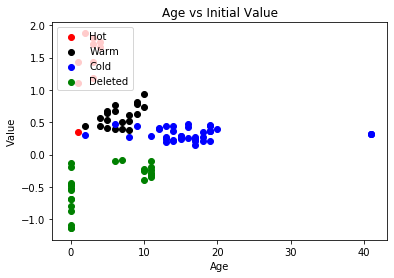

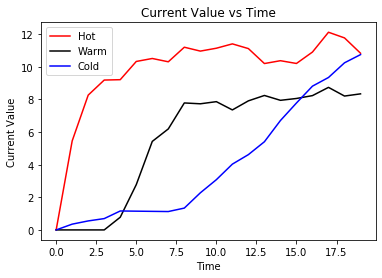

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513]]
0 rows expired in 3      Age  Key Terrain   Queries
0   19.0     0.715189  0.602763
1   18.0     0.405942  0.024313
2   17.0     0.300189  0.266788
3   16.0     0.956942  0.666005
4   17.0     0.474885  0.435883
5   41.0     0.622231  0.279068
6   41.0     0.622231  0.279068
7   41.0     0.622231  0.279068
8 

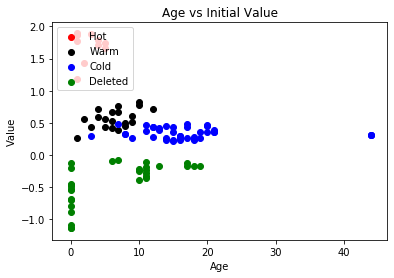

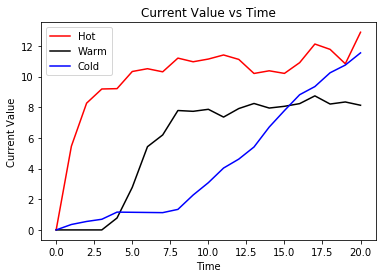

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225]]
0 rows expired in 3      Age  Key Terrain   Queries
0   20.0     0.715189  0.602763
1   12.0     0.870671  0.302413
2   11.0     0.942501  0.388171
3   17.0     0.956

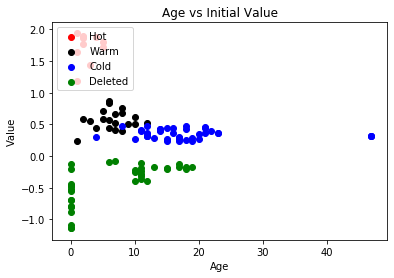

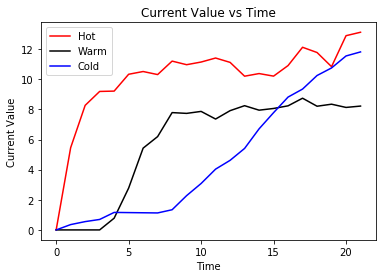

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764]]
0 rows expired in 3    

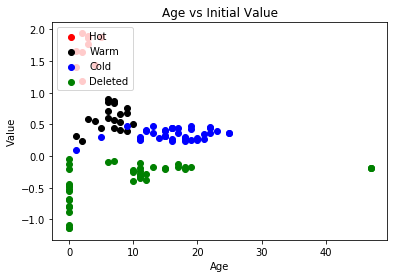

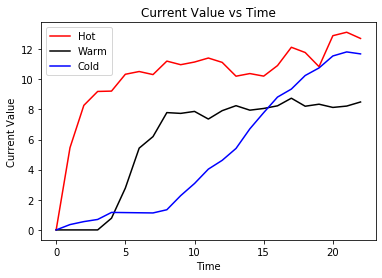

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255

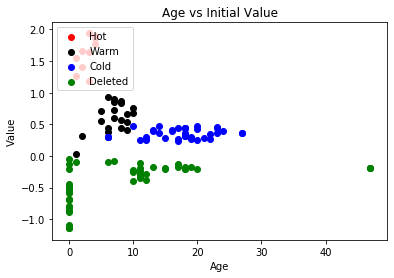

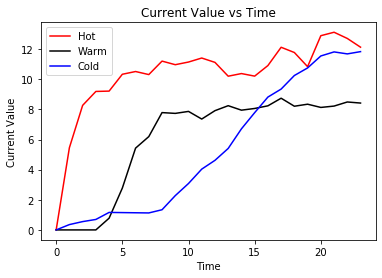

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255

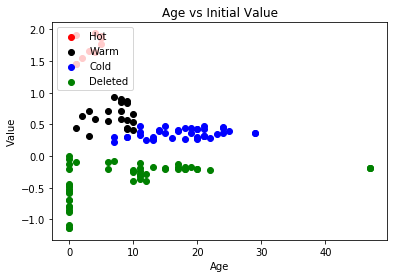

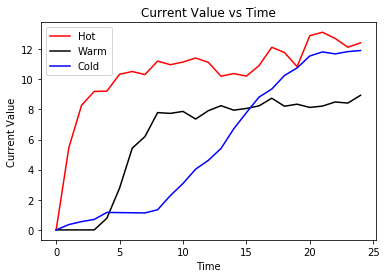

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255

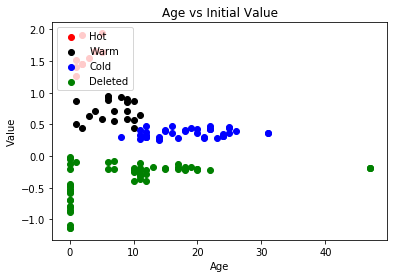

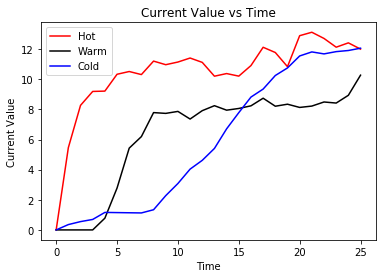

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255

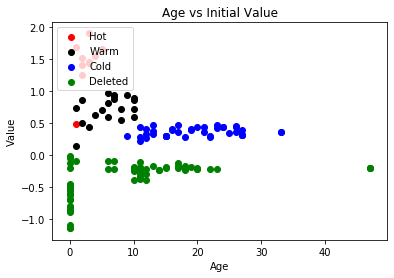

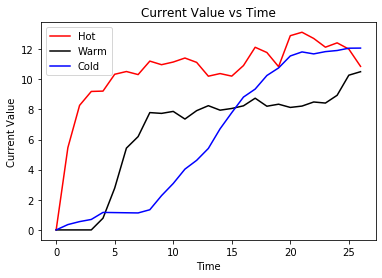

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255

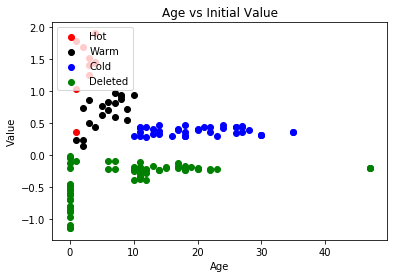

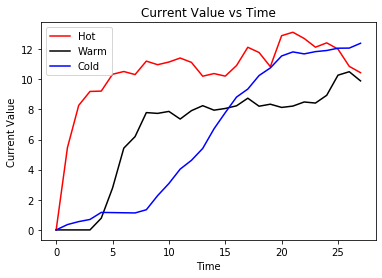

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255

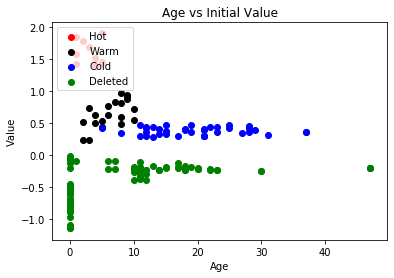

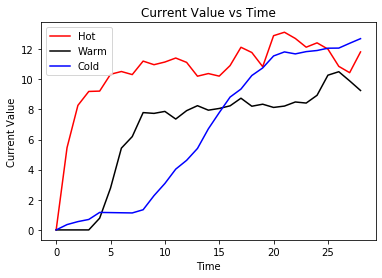

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255

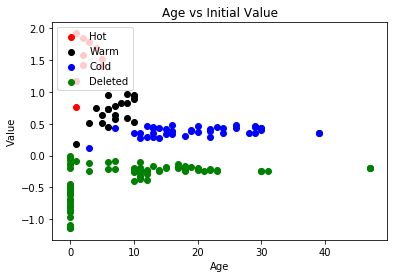

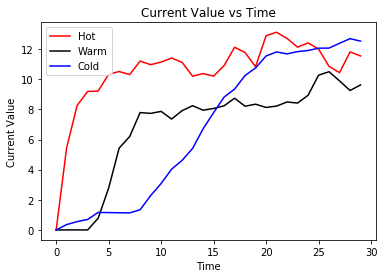

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255

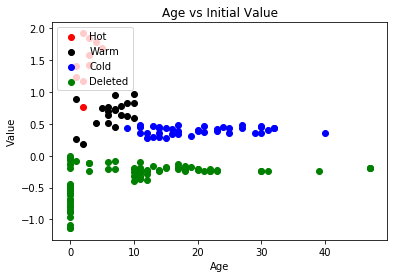

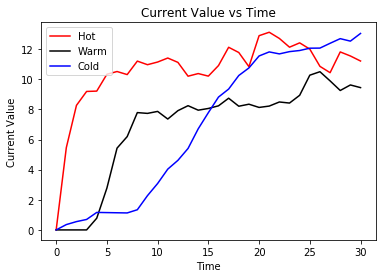

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255

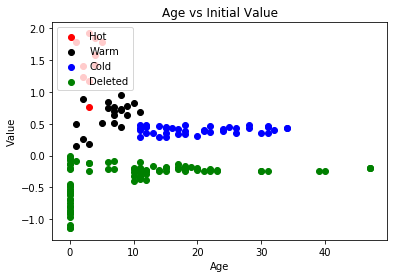

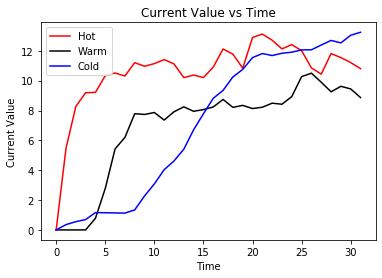

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255

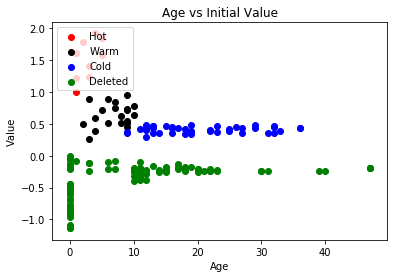

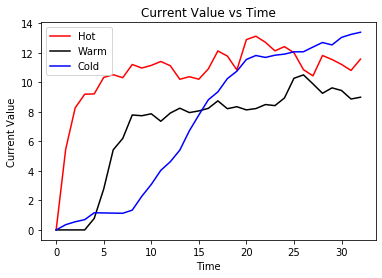

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255

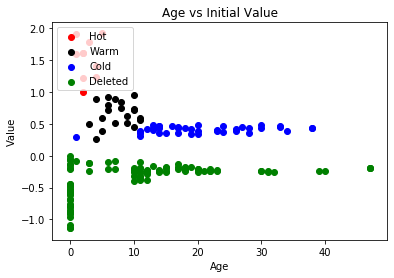

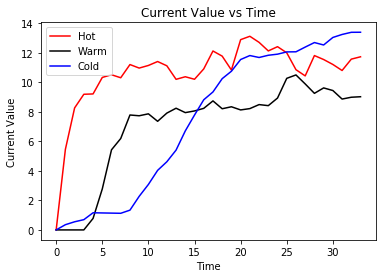

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255

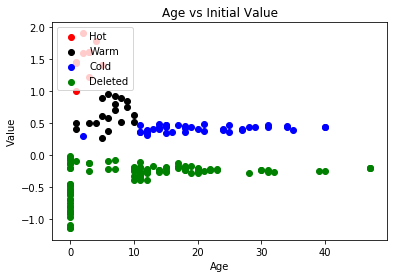

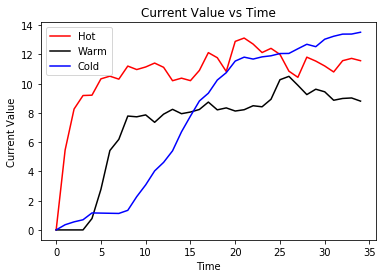

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255

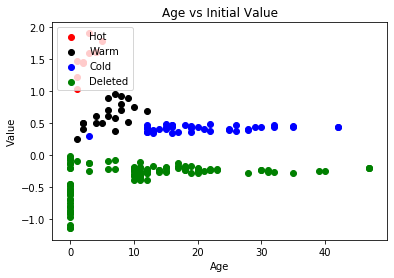

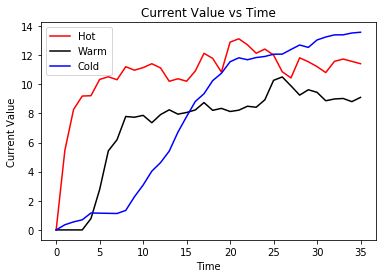

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255

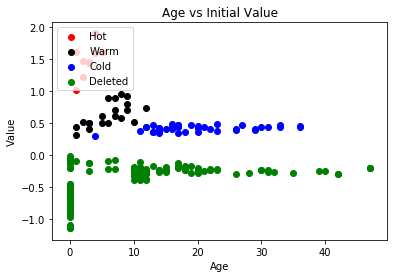

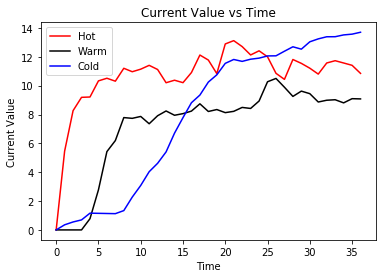

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255

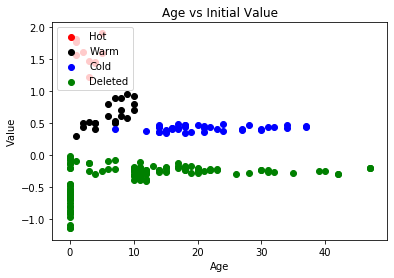

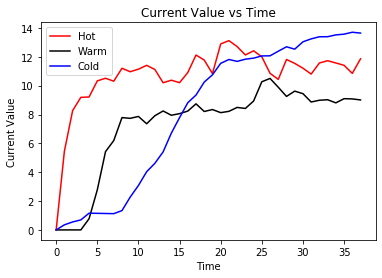

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255

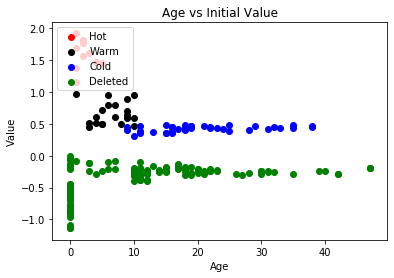

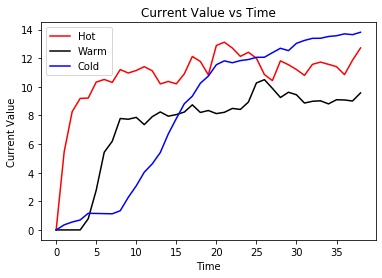

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255

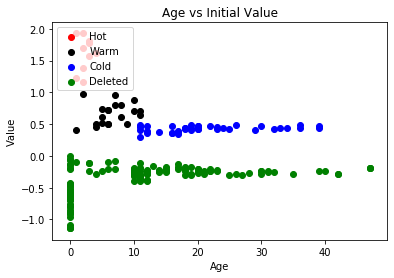

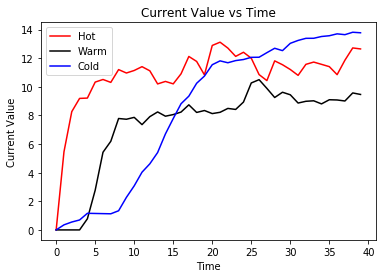

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255

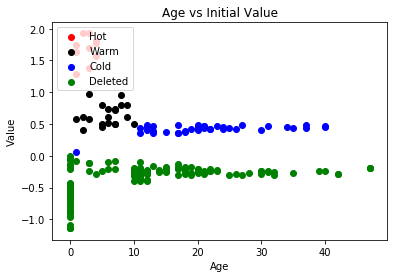

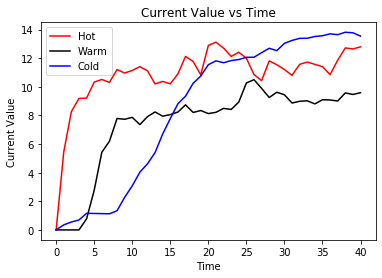

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [7.0, 0.0812622584268254], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [17.0, 0.1265213301795139], [13.0, 0.16639367360417875], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [15.0, 0.18191609560023325], [18.0, 0.19814898275285145], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255

In [3]:
env.__myinit__(env_config)
np.random.seed(0)

# Variable initialization for manual looping
loop = 0

# Variables for keeping track of total values over time
vals_plot = [[0],[0],[0]]
t = 0

for q in np.arange(40):
    # New batch of 5 lines, here represented by 5 random values
    batch = pd.read_csv("dns.log",header = 0)
    vals = pd.DataFrame(np.random.random((5,3)),columns=['Age','Key Terrain','Queries'])
    vals['Age'] = 0
    val_tot = vals.drop(['Age'],axis=1).sum(axis=1).values
    rplan = np.hstack((np.mgrid[0:5, 1:4][1].astype(int),np.zeros(5).reshape(-1,1).astype(int)))
    ind = np.zeros(5).astype(int)
    loop += 5
    db = dataBatch(batch,vals,val_tot,ind,rplan)

    toy_agents.batch_load_static(env, db, 100)
    t += 1
    env.render(out=0)
    clr = ['r','k','b']
    sub = plt.subplot()
    sub.set_title('Current Value vs Time')
    sub.set_xlabel('Time')
    sub.set_ylabel('Current Value')
    for i in np.arange(env.num_ds):
        vals_plot[i].append(sum(np.nan_to_num(env.ds[env.names[i+1]].dataBatch.get('val_tot'))))
        sub.plot(np.arange(t+1),vals_plot[i], c = clr[i], label = env.names[i+1])

    sub.legend(loc=2)
    plt.show()

    #env.render(out=1)
    print(env.del_val)